# Análise de vendas dos jogos da sétima geração de videogames
### Um estudo comparativo entre Xbox 360, Playstation 3 e Wii com foco nos mercados norte-americano e japonês

## Sobre este projeto
A sétima geração de videogames (Xbox 360, Playstation 3 e Nintendo Wii) foi marcada por uma intensa batalha por mercados e identidades.

Este projeto não busca aclamar um vencedor desta geração. Em vez disso, utiliza esse contexto competitivo para investigar como as preferências culturais e de consumo, se manifestam nos dados de vendas de jogos entre estas duas regiões tão distintas.

## Estrutura da análise
### Parte 1: Contexto histórico e panorama geral
### Parte 2: Análise comparativa entre os mercados norte-americano e japonês

<img src="../images/gen7.jpg" width="800" height="400">

## Importando bibliotecas

In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


from src.utils import (
    remove_duplicates_per_platform,
    display_null,
    update_year_of_release,
    get_console_exclusives_by_year,
    get_console_releases_by_year,
    display_top_10_games, update_publisher,
    filter_and_print_top_exclusives,
    print_exclusives_by_platforms,
    print_exclusives_by_region, 
    display_top_10_games_by_platform
)

from src.visualization import (
    plot_global_market_share_pie_chart,
    plot_sales_by_platform_region,
    plot_region_market_share_pie_charts,
    plot_total_titles_by_platform,
    plot_games_per_platform_year,
    plot_regional_games,
    plot_total_sales_by_platform,
    plot_top_games_by_region,
    plot_top_games_by_console_and_region,
    plot_titles_by_genre,
    plot_top_genres_by_region,
    plot_market_share_by_genre,
    plot_top_titles_by_region,
    plot_top_genres_by_console_and_region,
    plot_top_rated_score,
    plot_top_exclusives_console_by_region,
    plot_genres_count_by_publishers_global,
    plot_sales_histograms, 
    plot_platform_sales_histograms,
    plot_top_publishers_by_region,
    plot_rating_distribution,
    plot_rating_distribution_by_platform,
    plot_sales_by_rating_per_region, 
    plot_sales_by_rating_per_platform
)

from src.constants import (
    font, region_info,
    gen5, gen6, gen7,
    year_mapping_gen7
)

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
games = pd.read_csv("../data/Video_Games.csv")

## Listando todas as plataformas presentes no dataset

In [3]:
platforms = games['platform'].unique()
print("Consoles presentes no dataset:")
print(platforms)

Consoles presentes no dataset:
['Wii' 'NES' 'GB' 'DS' 'PS3' 'PS2' 'SNES' 'X360' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


## Criando dataframes contendo as plataformas da 7ª, 6ª e 5ª geração

In [4]:
df_7th_gen = games[games['platform'].isin(gen7)]
df_6th_gen = games[games['platform'].isin(gen6)]
df_5th_gen = games[games['platform'].isin(gen5)]

In [5]:
df_7th_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3976 entries, 0 to 16925
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3976 non-null   object 
 1   platform         3976 non-null   object 
 2   year_of_release  3886 non-null   float64
 3   genre            3976 non-null   object 
 4   publisher        3969 non-null   object 
 5   na_sales         3976 non-null   float64
 6   eu_sales         3976 non-null   float64
 7   jp_sales         3976 non-null   float64
 8   other_sales      3976 non-null   float64
 9   global_sales     3976 non-null   float64
 10  critic_score     2370 non-null   float64
 11  critic_count     2370 non-null   float64
 12  user_score       2456 non-null   float64
 13  user_count       2456 non-null   float64
 14  developer        3099 non-null   object 
 15  rating           3064 non-null   object 
dtypes: float64(10), object(6)
memory usage: 528.1+ KB


## Lidando com títulos duplicados em cada plataforma

In [6]:
df_7th_gen = remove_duplicates_per_platform(df_7th_gen, gen7)
df_6th_gen = remove_duplicates_per_platform(df_6th_gen, gen6)
df_5th_gen = remove_duplicates_per_platform(df_5th_gen, gen5)

Número de títulos duplicados na plataforma Xbox 360 antes da remoção: 19
Número de títulos duplicados na plataforma Xbox 360 após a remoção: 0


Número de títulos duplicados na plataforma Playstation 3 antes da remoção: 30
Número de títulos duplicados na plataforma Playstation 3 após a remoção: 0


Número de títulos duplicados na plataforma Nintendo Wii antes da remoção: 17
Número de títulos duplicados na plataforma Nintendo Wii após a remoção: 0

Número de títulos duplicados na plataforma Xbox antes da remoção: 8
Número de títulos duplicados na plataforma Xbox após a remoção: 0


Número de títulos duplicados na plataforma Playstation 2 antes da remoção: 27
Número de títulos duplicados na plataforma Playstation 2 após a remoção: 0


Número de títulos duplicados na plataforma Nintendo Gamecube antes da remoção: 8
Número de títulos duplicados na plataforma Nintendo Gamecube após a remoção: 0


Número de títulos duplicados na plataforma Sega Dreamcast antes da remoção: 0
Número de títulos

## Verificando valores NULL

In [7]:
display_null(df_7th_gen)

Valores nulos em: df_7th_gen

title 0
platform 0
year_of_release 88
genre 0
publisher 6
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
global_sales 0
critic_score 1592
critic_count 1592
user_score 1510
user_count 1510
developer 872
rating 907




#### Lidarei com estes valores mais adiante, quando necessário.

#### Mais abaixo, quando estava analisando os 10 jogos mais vendidos por plataforma e região, descobri que havia um erro no dataset. O título 'Kinect Adventures!' estava classificado como um jogo lançado para o Wii, mas na verdade, é um título de Xbox 360. Como isso alteraria as pesquisas feitas anteriormente, irei corrigir isso logo aqui no início do projeto. Também padronizei os valores da coluna 'critic_score'.

In [8]:
index_kinect_adventures = df_7th_gen[df_7th_gen['title'] == 'Kinect Adventures!'].index
df_7th_gen.loc[index_kinect_adventures, 'platform'] = 'X360'

df_7th_gen[df_7th_gen['title'] == 'Kinect Adventures!']

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
2595,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.0,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E


In [9]:
df_7th_gen['critic_score'] = df_7th_gen['critic_score']/10

#### Outro encontrado foi 'FIFA Soccer 13' sendo listado como do gênero de 'Action'. 
#### Corrigindo:

In [10]:
index_fifa_13 = df_7th_gen[df_7th_gen['title'] == 'FIFA Soccer 13'].index
df_7th_gen.loc[index_fifa_13, 'genre'] = 'Sports'

df_7th_gen[df_7th_gen['title'] == 'FIFA Soccer 13']

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
25,FIFA Soccer 13,X360,2012.0,Sports,Electronic Arts,1.09,3.47,0.03,0.57,5.16,9.0,48.0,6.1,403.0,Electronic Arts,E
1268,FIFA Soccer 13,PS3,2012.0,Sports,Electronic Arts,1.06,5.01,0.13,1.97,8.16,8.8,37.0,6.6,348.0,Electronic Arts,E
2824,FIFA Soccer 13,Wii,2012.0,Sports,Electronic Arts,0.18,0.44,0.00,0.07,0.69,NaN,NaN,1.6,21.0,Electronic Arts,E


# Parte 1: Contexto histórico e panorama geral

## A era de ouro da Sony: De parceira traída a líder incontestável do mercado

Ainda na quarta geração, a Sony havia fechado uma parceria estratégica com a Nintendo para desenvolver um periférico de CD-ROM que seria integrado com o Super Nintendo — o prototipo do console foi chamado de *Nintendo PlayStation*. Porém, a Nintendo desfez o acordo de última hora e assinou com a Philips. 

Determinada a entrar no mercado, a Sony então se aliou à Sega, desenvolvendo jogos para o Sega CD.

Posteriormente, a Sony entrou no mercado da quinta geração com seu próprio console, o *Playstation*, e teve um sucesso retumbante. O impacto foi imediato e avassalador.

Então por duas gerações, a Sony dominou o mercado sem que nenhum concorrente chegasse perto. A empresa parecia imbatível.

## Vendas de jogos por plataforma e região (5ª geração)

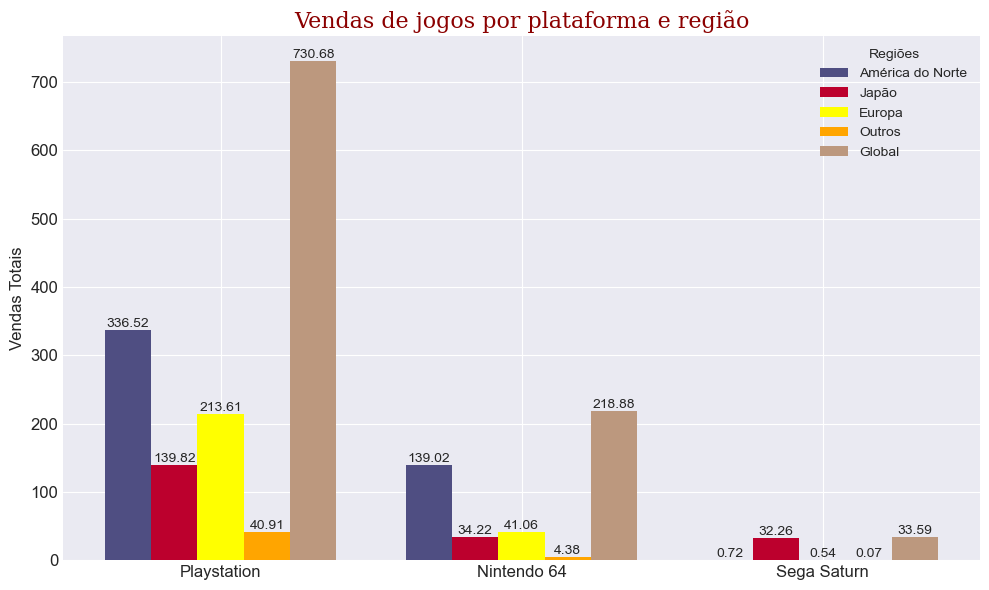

In [11]:
plot_sales_by_platform_region(df_5th_gen, region_info, gen5)

A Microsoft também entrou no mercado na 6ª geração, com seu primeiro *Xbox*, conseguindo superar a Nintendo em todos mercados, exceto no Japão. A Sega deu seu último suspiro no mercado de consoles com o *Sega Dreamcast*.

## Vendas de jogos por plataforma e região (6ª geração)

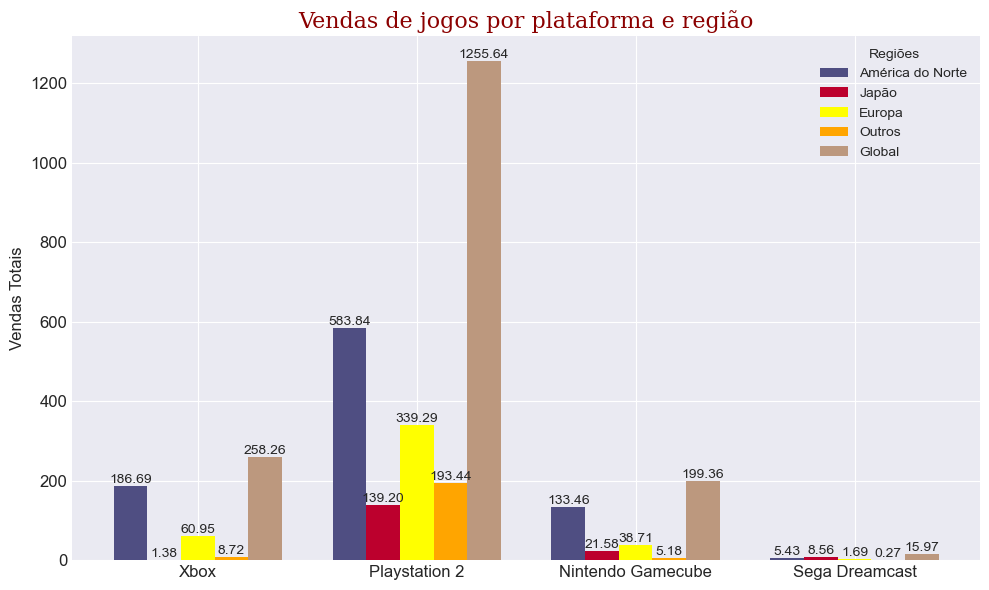

In [12]:
plot_sales_by_platform_region(df_6th_gen, region_info, gen6)

## A ascenção da Microsoft

Porém, as coisas mudaram na 7ª geração: Embora a Sony tenha mantido sua hegemonia nos mercados japonês e europeu, a Microsoft com seu segundo colsole -  *Xbox 360* — conseguiu desbancar o domínio de vendas de títulos do *Playstation* no mercado norte-americano, que acabou tabém sendo ultrapassado pela Nintendo neste mercado e amargou a lanterna das vendas.

## Vendas de jogos por plataforma e região (7ª geração)

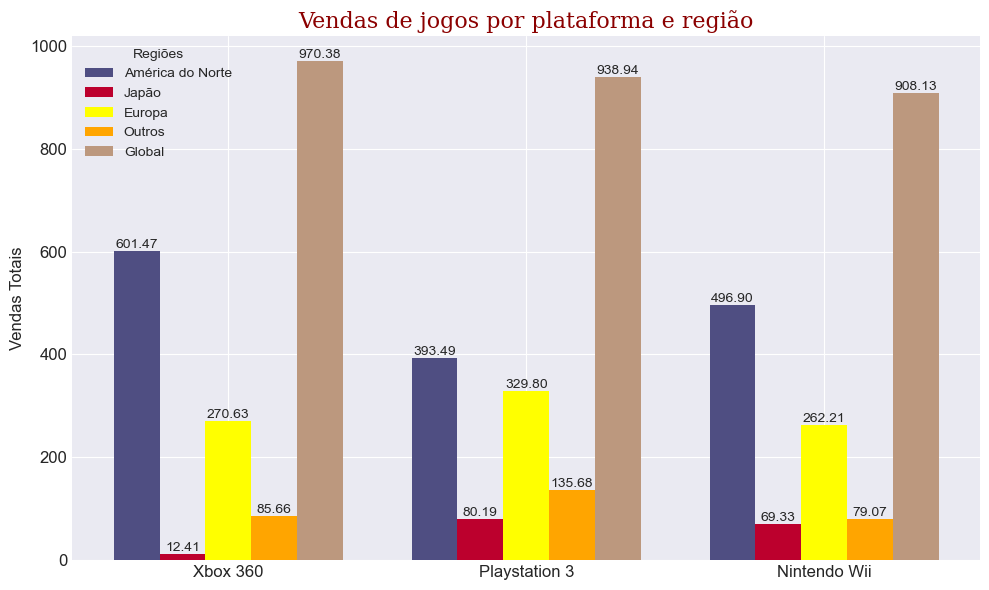

In [13]:
plot_sales_by_platform_region(df_7th_gen, region_info, gen7)

# A 7ª geração de videogames

## Quantos títulos foram lançados em cada plataforma?

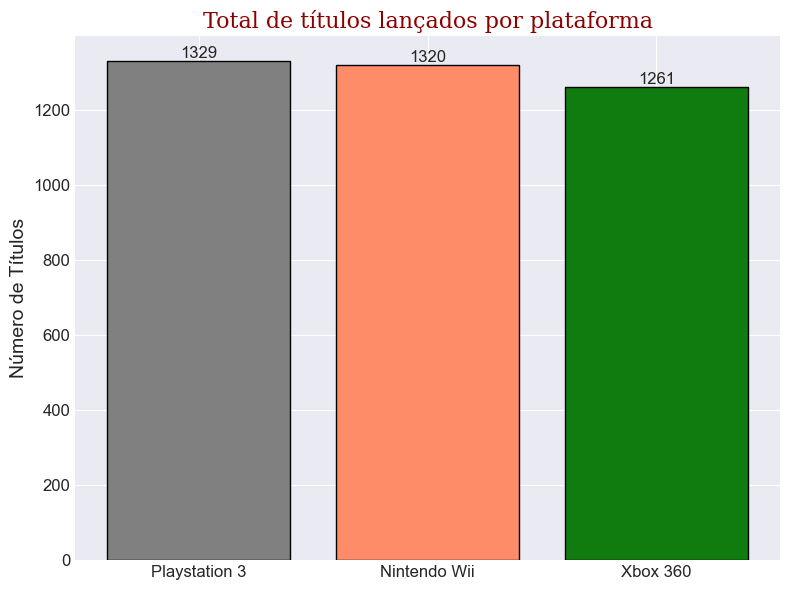

In [14]:
plot_total_titles_by_platform(df_7th_gen, gen7)

### Como visto anteriormente, a coluna 'year_of_release' possui valores nulos. 
Listando estes títulos:

In [15]:
year_nan = df_7th_gen[df_7th_gen['year_of_release'].isna()]
list(year_nan['title'].unique())

['Rock Band',
 'LEGO Harry Potter: Years 5-7',
 'The Lord of the Rings: War in the North',
 'Shaun White Snowboarding',
 'Test Drive Unlimited 2',
 'Madden NFL 06',
 'Wet',
 'Silent Hill: Homecoming',
 "Robert Ludlum's The Bourne Conspiracy",
 'Tropico 4',
 'Singularity',
 'Gun',
 'Star Trek: Legacy',
 'Backbreaker',
 'Otomedius Excellent',
 'Jurassic Park: The Game',
 'Bejeweled 3',
 'WRC: FIA World Rally Championship',
 'Happy Feet Two',
 'Get Fit with Mel B',
 'Yoostar on MTV',
 'Port Royale 3',
 'National Geographic Challenge!',
 'Mobile Ops: The One Year War',
 'Tour de France 2011',
 'Majesty 2: The Fantasy Kingdom Sim',
 'World of Tanks',
 'Football Manager 2007',
 'AKB1/48: Idol to Guam de Koishitara...',
 'Brothers in Arms: Furious 4',
 'Yakuza 4',
 'Rock Revolution',
 'Jonah Lomu Rugby Challenge',
 'Move Fitness',
 'Splatterhouse',
 'Record of Agarest War Zero',
 'Monster Hunter Frontier Online',
 'Battle vs. Chess',
 'The History Channel: Great Battles - Medieval',
 'Umineko

## Atualizando 'year_of_release' destes títulos
Como não há tantos títulos com valores nulos neste campo, atualizei essas informações de forma manual. 

In [16]:
df_7th_gen['year_of_release'] = df_7th_gen['year_of_release'].astype('Int64')
update_year_of_release(df_7th_gen, year_mapping_gen7)

Valores nulos restantes: 0


## Quantos jogos cada plataforma recebeu anualmente?

O Wii teve seu pico de lançamentos no quarto ano de vida do console, incluindo sucessos de vendas como *Wii Sports Resort*, *New Super Mario Bros. Wii* e *Wii Fit Plus*.

Xbox 360 e Playstation 3 tiveram seu pico de lançamentos já no início da década seguinte, em 2011.

Destacando-se os exclusivos: *Gears of War 3* (Xbox 360) e *Uncharted 3: Drake's Deception* (Playstation 3). E os multiplataformas *Call of Duty: Modern Warfare 3* e *The Elder Scrolls V: Skyrim*.

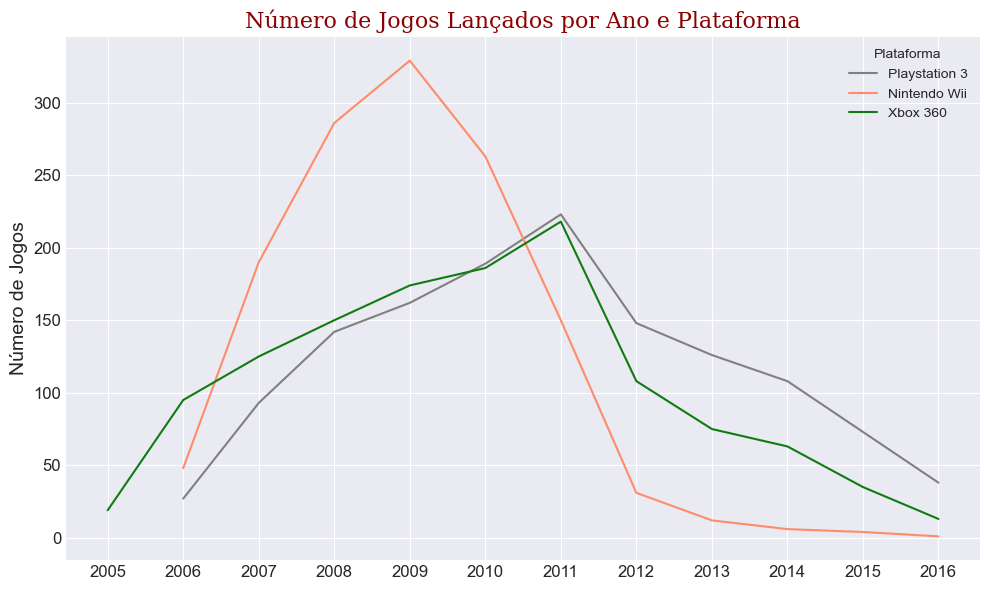

In [17]:
plot_games_per_platform_year(df_7th_gen, gen7)

Como o dataset não possui informações de vendas anuais de cada game, utilizei *global_sales* para retornar os principais games de cada ano.

In [18]:
print("Principais títulos de 2009 - Wii")
get_console_releases_by_year(df_7th_gen, 'Wii', 2009).head()

Principais títulos de 2009 - Wii


,title,genre,year_of_release,global_sales
1,Wii Sports Resort,Sports,2009,32.77
2,New Super Mario Bros. Wii,Platform,2009,28.32
3,Wii Fit Plus,Sports,2009,21.79
4,Just Dance,Misc,2009,7.20
5,Mario & Sonic at the Olympic Winter Games,Sports,2009,4.53


In [19]:
print("Principais títulos de 2011 - Xbox 360")
get_console_releases_by_year(df_7th_gen, 'X360', 2011).head()

Principais títulos de 2011 - Xbox 360


,title,genre,year_of_release,global_sales
1,Call of Duty: Modern Warfare 3,Shooter,2011,14.73
2,The Elder Scrolls V: Skyrim,Role-Playing,2011,8.79
3,Battlefield 3,Shooter,2011,7.32
4,Gears of War 3,Shooter,2011,6.21
5,Batman: Arkham City,Action,2011,4.73


In [20]:
print("Principais títulos de 2011 - Playstation 3")
get_console_releases_by_year(df_7th_gen, 'PS3', 2011).head()

Principais títulos de 2011 - Playstation 3


,title,genre,year_of_release,global_sales
1,Call of Duty: Modern Warfare 3,Shooter,2011,13.32
2,Battlefield 3,Shooter,2011,7.17
3,Uncharted 3: Drake's Deception,Action,2011,6.74
4,FIFA 12,Sports,2011,6.65
5,The Elder Scrolls V: Skyrim,Role-Playing,2011,6.41


# Os primeiros anos de cada plataforma

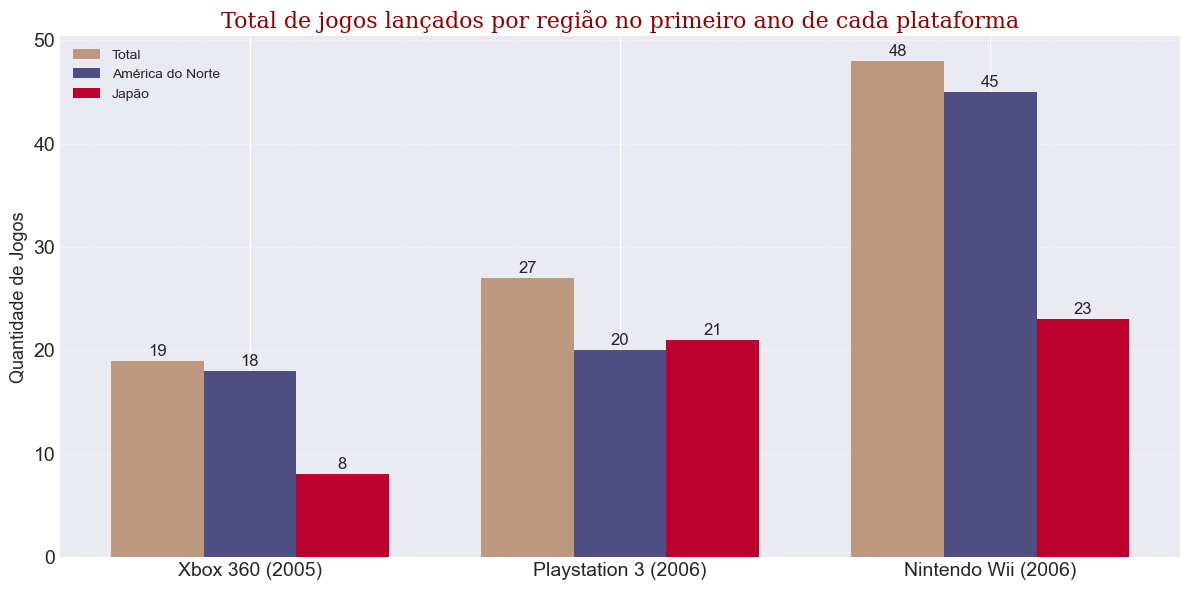

In [21]:
platforms_years = {'X360': 2005, 'PS3': 2006, 'Wii': 2006}
plot_regional_games(df_7th_gen, gen7, platforms_years)

## Exclusividade e vantagem inicial: o Xbox 360 e a resposta do Playstation 3

### Principais lançamentos do Xbox 360 em seu ano de estréia (2005)
O Xbox 360 foi lançado em 2005, sendo o primeiro da geração. Em seu primeiro ano, sua linha inicial de 19 jogos — com prioridade para o mercado norte-americano — não tinha nada de notável, o destaque ficou para *Call of Duty 2* e *Perfect Dark Zero* - mas nenhum dos dois representou um verdadeiro impulsionador de vendas.

In [22]:
get_console_exclusives_by_year(df_7th_gen, 'X360', 2005).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Call of Duty 2,Shooter,2005,2.03,1.82,0.01,8.9,8.1
2,Perfect Dark Zero,Shooter,2005,0.77,0.66,0.03,8.1,7.3
3,PGR3 - Project Gotham Racing 3,Racing,2005,0.60,0.49,0.03,NaN,NaN
4,Madden NFL 06,Sports,2005,0.59,0.54,0.01,7.4,4.9
5,Dead or Alive 4,Fighting,2005,0.47,0.30,0.10,8.5,8.2


Em 2006, o Playstation 3 foi lançado na América e no Japão. Recebeu 27 títulos em seu primeiro ano, com lançamentos distribuídos de forma equilibrada entre América do Norte e Japão. Apesar do catálogo mais amplo que o do Xbox 360 no ano anterior, também não tinha muito a oferecer. O destaque ficou com o título *Resistance: Fall of Man*.

### Principais lançamentos exclusivos do Playstation 3 em 2006

In [23]:
print("* MotorStorm foi lançado na América do Norte apenas em 2007.")
get_console_exclusives_by_year(df_7th_gen, 'PS3', 2006).head()

* MotorStorm foi lançado na América do Norte apenas em 2007.


,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Resistance: Fall of Man,Shooter,2006,4.34,1.74,0.14,8.6,8.1
2,MotorStorm,Racing,2006,3.87,1.53,0.06,8.4,7.4
3,Ridge Racer 7,Racing,2006,1.36,0.24,0.16,7.8,7.1
4,Genji: Days of the Blade,Action,2006,0.75,0.18,0.06,5.5,5.8
5,Formula 1: Championship Edition,Racing,2006,0.61,0.00,0.04,NaN,NaN


Neste mesmo ano, o Xbox 360, expandiu sua biblioteca com exclusivos de peso, incluindo *Dead Rising*, *Saints Row* e *The Elder Scrolls IV: Oblivion* (exclusivo em seu lançamento). 
O lançamento de *Gears of War*, coincidiu com o início do PlayStation 3, e destacou-se como um sucesso crítico e comercial, com seu foco pesado em combate baseado em cobertura sendo visto como uma abordagem fresca para o gênero de tiro.

### Principais lançamentos exclusivos de Xbox 360 em 2006

In [24]:
get_console_exclusives_by_year(df_7th_gen, 'X360', 2006).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Gears of War,Shooter,2006,6.09,3.54,0.07,9.4,8.3
2,Saints Row,Action,2006,2.18,1.17,0.02,8.1,7.5
3,Dead Rising,Action,2006,2.08,1.16,0.08,8.5,7.6
4,Viva Pinata,Simulation,2006,1.62,0.45,0.02,8.4,8.0
5,Tom Clancy's Ghost Recon Advanced Warfighter,Shooter,2006,1.54,1.40,0.02,9.0,8.0


In [25]:
df_7th_gen.query("title.str.contains('oblivion', case=False) and platform == 'X360'")[['title', 'genre', 'year_of_release', 'global_sales', 'na_sales', 'jp_sales', 'critic_score', 'user_score']]

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
31,The Elder Scrolls IV: Oblivion,Role-Playing,2006,4.38,2.82,0.13,9.4,8.7


O ano de 2007 trouxe mais exclusivos para o sistema da Microsoft, incluindo *Forza Motorsport 2*, *BioShock* e *Mass Effect*. O maior deles foi o aguardado *Halo 3*, que prometia aos jogadores a chance de "terminar a luta" no que seria o jogo final do Master Chief. Halo 3 foi enorme, vendendo mais de 12 milhões de cópias vendidas globalmente.

### Principais lançamentos exclusivos de Xbox 360 em 2007

In [26]:
get_console_exclusives_by_year(df_7th_gen, 'X360', 2007).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Halo 3,Shooter,2007,12.12,7.97,0.13,9.4,7.8
2,Forza Motorsport 2,Racing,2007,4.05,2.35,0.03,9.0,8.3
3,Mass Effect,Role-Playing,2007,2.91,1.83,0.03,9.1,8.7
4,Guitar Hero II,Misc,2007,2.20,2.01,0.00,9.2,8.1
5,PGR4 - Project Gotham Racing 4,Racing,2007,2.04,0.48,0.02,NaN,NaN


In [27]:
df_7th_gen.query("title == 'BioShock' and platform == 'X360'")[['title', 'genre', 'year_of_release', 'global_sales', 'na_sales', 'jp_sales', 'critic_score', 'user_score']]

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
65,BioShock,Shooter,2007,2.83,1.65,0.05,9.6,8.9


A Sony teve alguns exclusivos próprios naquele ano, mas títulos como *Ratchet & Clank Future: Tools of Destruction*, *Gran Turismo 5 Prologue* e *Uncharted: Drake's Fortune* não foram suficientes para igualar as ofertas superiores do Xbox 360. Além disso, muitas das séries que antes faziam do PlayStation o rei dos consoles estavam se tornando ou já haviam se tornado multiplataforma — de *Grand Theft Auto* a *Devil May Cry*, *Tomb Raider* e *Tekken*. A lista de exclusivos da Sony parecia estar ficando cada vez menor.

### Principais lançamentos exclusivos do Playstation 3 em 2007

In [28]:
get_console_exclusives_by_year(df_7th_gen, 'PS3', 2007).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Uncharted: Drake's Fortune,Action,2007,4.92,2.31,0.12,8.8,8.1
2,Gran Turismo 5 Prologue,Racing,2007,4.19,1.28,0.57,8.0,7.1
3,Ratchet & Clank Future: Tools of Destruction,Platform,2007,2.56,0.93,0.08,NaN,NaN
4,Heavenly Sword,Action,2007,1.65,0.57,0.06,7.9,8.3
5,Ninja Gaiden Sigma,Action,2007,1.14,0.57,0.09,8.8,7.5


## A exclusividade temporária do Xbox 360

Como o Xbox 360 era mais fácil de desenvolver, a maioria dos jogos multiplataforma era desenvolvida principalmente para o Xbox 360 e só depois portada para o Playstation 3.

Além disso, diversos títulos saíram antes no Xbox 360, consolidando a plataforma como o ambiente de estréia para muitas franquias third-party na 7ª geração. Contudo, a maioria desses títulos não permaneceu exclusiva, o Playstation 3 recebeu versões posteriores, frequentemente com atraso de um ou dois anos. Casos como *The Elder Scrolls IV: Oblivion* e *BioShock* são exemplares — lançados inicialmente como exclusivos (parciais ou temporários) no Xbox 360, mas posteriormente portados para o sistema da Sony.

Essa janela de exclusividade temporária foi estratégica para a Microsoft, ajudando o Xbox 360 a manter uma vantagem inicial na geração, especialmente entre 2006 e 2008. No entanto, ao longo do tempo, o Playstation 3 recuperou terreno conforme essas franquias se tornaram multiplataforma.

In [29]:
df_7th_gen['year_of_release'] = df_7th_gen['year_of_release'].astype('Int64')

df_x360_ps3 = df_7th_gen[df_7th_gen['platform'].isin(['X360', 'PS3'])]

release_years = df_x360_ps3.pivot_table(
    index='title',
    columns='platform',
    values='year_of_release',
    aggfunc='min'
)

titles_x360_before = release_years[
    (release_years['X360'] < release_years['PS3'])
].copy()

x360_versions = df_7th_gen[
    (df_7th_gen['platform'] == 'X360') &
    (df_7th_gen['title'].isin(titles_x360_before.index))
].copy()

x360_versions['ps3_release_year'] = x360_versions['title'].map(titles_x360_before['PS3'])

x360_versions = x360_versions.rename(columns={
    'year_of_release': 'x360_release_year',
    'global_sales': 'x360_global_sales'
})

ps3_versions = df_7th_gen[
    (df_7th_gen['platform'] == 'PS3') &
    (df_7th_gen['title'].isin(titles_x360_before.index))
][['title', 'global_sales']].rename(columns={'global_sales': 'ps3_global_sales'})

x360_versions = x360_versions.merge(ps3_versions, on='title', how='left')

display(Markdown("### Jogos lançados primeiramente no Xbox 360 e depois no PS3"))
display(
    x360_versions[['title', 'x360_release_year', 'ps3_release_year', 
                   'x360_global_sales', 'ps3_global_sales']]
    .sort_values(by='x360_release_year')
    .style
    .format({'x360_global_sales': '{:.2f}', 'ps3_global_sales': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
)

### Jogos lançados primeiramente no Xbox 360 e depois no PS3

title,x360_release_year,ps3_release_year,x360_global_sales,ps3_global_sales
The Elder Scrolls IV: Oblivion,2006,2007,4.38,3.10
Enchanted Arms,2006,2007,0.19,0.20
Tom Clancy's Rainbow Six: Vegas,2006,2007,1.95,1.25
Lost Planet: Extreme Condition,2006,2008,1.34,0.64
Tom Clancy's Splinter Cell: Double Agent,2006,2007,0.78,0.26
Samurai Warriors 2,2006,2013,0.08,0.03
F.E.A.R.,2006,2007,0.34,0.54
Enchanted Arms (JP sales),2006,2007,0.02,0.04
College Hoops 2K7,2006,2007,0.21,0.18
Worms,2007,2009,0.02,0.02


## Nintendo Wii: Inovação ao invés de potência

Enquanto o Playstation 3 e o Xbox 360 competiam acirradamente pelo mercado de jogos hardcore, o Wii mirou em outro público: famílias e jogadores casuais. Lançado em 2006, mesmo ano do Playstation 3, o console inovou com controle de movimento. No primeiro ano, o Wii recebeu 48 lançamentos, destacando-se *Wii Sports* que obteve um total impressionante de 82,53 milhões de cópias vendidas.
Outros novos jogos próprios com controle de movimento, como *Wii Play*, *Wii Fit*, também venderam números impressionantes, com a Nintendo conseguindo mostrar várias maneiras criativas de usar sua nova tecnologia.

### Principais lançamentos exclusivos do Wii em 2006

In [30]:
get_console_exclusives_by_year(df_7th_gen, 'Wii', 2006).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Wii Sports,Sports,2006,82.53,41.36,3.77,7.6,8.0
2,Wii Play,Misc,2006,28.92,13.96,2.93,5.8,6.6
3,The Legend of Zelda: Twilight Princess,Action,2006,7.15,3.74,0.60,9.5,9.0
4,WarioWare: Smooth Moves,Puzzle,2006,2.89,0.86,0.73,8.3,7.4
5,Super Monkey Ball: Banana Blitz,Misc,2006,2.24,1.05,0.04,7.4,5.7


In [31]:
get_console_exclusives_by_year(df_7th_gen, 'Wii', 2007).head()

,title,genre,year_of_release,global_sales,na_sales,jp_sales,critic_score,user_score
1,Wii Fit,Sports,2007,22.70,8.92,3.60,8.0,7.7
2,Super Mario Galaxy,Platform,2007,11.35,6.06,1.20,9.7,8.9
3,Mario Party 8,Misc,2007,8.27,3.74,1.58,6.2,6.3
4,Mario & Sonic at the Olympic Games,Sports,2007,7.99,2.57,0.66,NaN,NaN
5,Link's Crossbow Training,Shooter,2007,4.98,3.05,0.29,6.8,7.1


## Desafios técnicos e perda de títulos multiplataforma
Um console menos potente levou a Nintendo a pagar um preço, o Wii acabou perdendo muitos dos títulos multiplataformas.

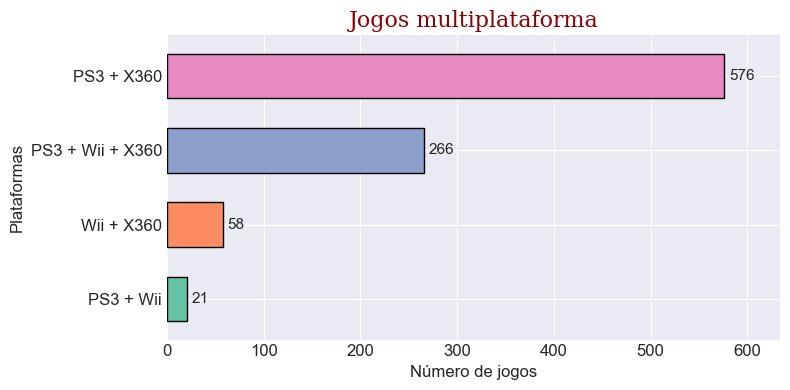

In [32]:
platform_combinations = (
    df_7th_gen.groupby('title')['platform']
    .apply(lambda x: tuple(sorted(x.unique())))
    .value_counts()
    .reset_index(name='count')
)

platform_combinations = platform_combinations[
    platform_combinations['platform'].apply(lambda x: len(x) > 1)
]
platform_combinations['platform'] = platform_combinations['platform'].apply(lambda x: " + ".join(x))
platform_combinations_sorted = platform_combinations.sort_values('count', ascending=True)

colors = plt.cm.Set2.colors

ax = platform_combinations_sorted.plot.barh(
    x='platform', 
    y='count', 
    figsize=(8, 4), 
    color=colors,
    edgecolor='black',
    fontsize=12,
    legend=False,
    width=0.6
)

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 5, y, str(int(width)), fontsize=11, va='center')

ax.set_xlim(0, platform_combinations_sorted['count'].max() * 1.1)

plt.xlabel("Número de jogos", fontsize=12)
plt.ylabel("Plataformas", fontsize=12)
plt.title("Jogos multiplataforma", fontdict=font, fontsize=16)
plt.tight_layout()
plt.show()

## Tendências da geração

### Jogos de ritmo

Os anos 2000 viram surgir e desaparecer a tendência de jogos de ritmo baseados em acessórios, em diferentes sistemas e títulos. As séries *Guitar Hero* e *Rock Band* tiveram vendas impressionantes (mais de 60 milhões de cópias vendidas no mercado global), com 23 títulos lançados.

In [33]:
rhythm_games = df_7th_gen['title'].str.contains(r'Guitar Hero|Rock Band', case=False)
df_rhythm_games = df_7th_gen[rhythm_games]

In [34]:
print(f"Foram lançados {len(df_rhythm_games['title'].unique())} títulos de ritmo na 7ª geração:")
print(df_rhythm_games['title'].unique().tolist())
print("")
print(f"Com mais de {round(df_rhythm_games['global_sales'].sum(),2)} milhões de cópias vendidas")

Foram lançados 23 títulos de ritmo na 7ª geração:
['Guitar Hero III: Legends of Rock', 'Guitar Hero: World Tour', 'Rock Band', 'Guitar Hero II', 'Rock Band 2', 'The Beatles: Rock Band', 'Guitar Hero: Aerosmith', 'Guitar Hero 5', 'Rock Band 3', 'Guitar Hero: Warriors of Rock', 'Guitar Hero: Metallica', 'LEGO Rock Band', 'Guitar Hero: Smash Hits', 'Green Day: Rock Band', 'Guitar Hero: Van Halen', 'Rock Band Country Track Pack', 'AC/DC LIVE: Rock Band Track Pack', 'Guitar Hero Live', 'Rock Band Track Pack Volume 2', 'Rock Band: Metal Track Pack', 'Rock Band Track Pack: Classic Rock', 'Rock Band Country Track Pack 2', 'Rock Band Track Pack Volume 1']

Com mais de 60.01 milhões de cópias vendidas


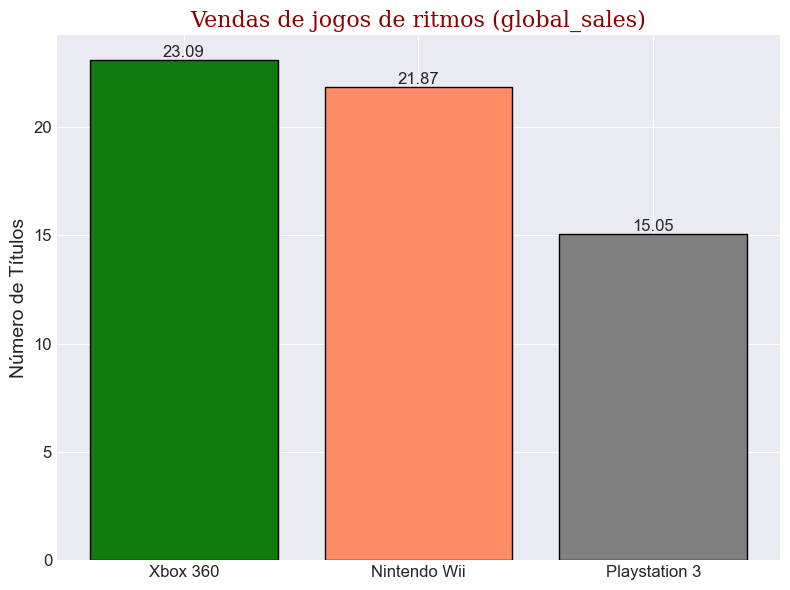

In [35]:
plot_total_sales_by_platform(df_rhythm_games, gen7, 'global_sales', 'jogos de ritmos')

### Franquia Call of Duty

A franquia *Call of Duty* dominou a sétima geração de consoles, com lançamentos anuais que se tornaram eventos aguardados pelos jogadores. Com destaque para as séries *Modern Warfare* e *Black Ops*. No total, a franquia vendeu mais de 183,69 milhões de cópias no mercado de consoles domésticos desta geração.

### Total de títulos de Call of Duty por plataforma

In [36]:
df_cod = df_7th_gen[df_7th_gen['title'].str.contains('call of d', case=False)]

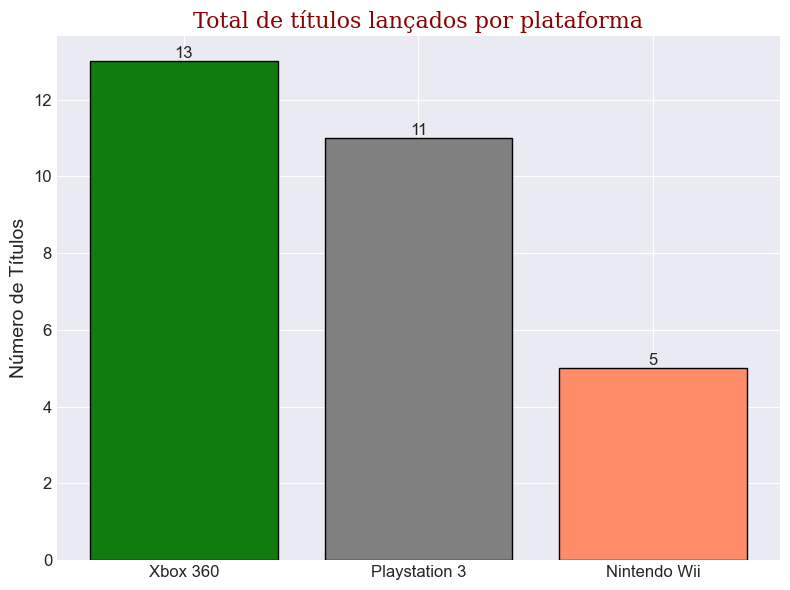

In [37]:
plot_total_titles_by_platform(df_cod, gen7)

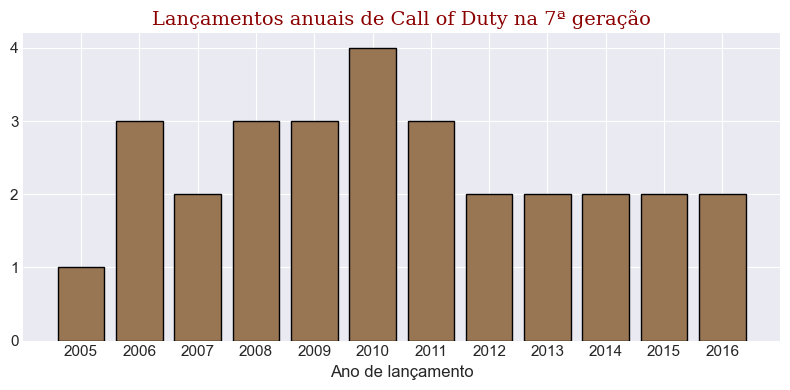

In [38]:
counts = df_cod['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(8,4))
bars = plt.bar(counts.index, counts.values, color='#987654' , edgecolor='black')
plt.yticks(range(0, counts.values.max() + 1), fontsize=11)
plt.xticks(counts.index, fontsize=11)
plt.xlabel('Ano de lançamento', fontsize=12)
plt.title('Lançamentos anuais de Call of Duty na 7ª geração', fontdict=font, fontsize=14)
plt.tight_layout()
plt.show()

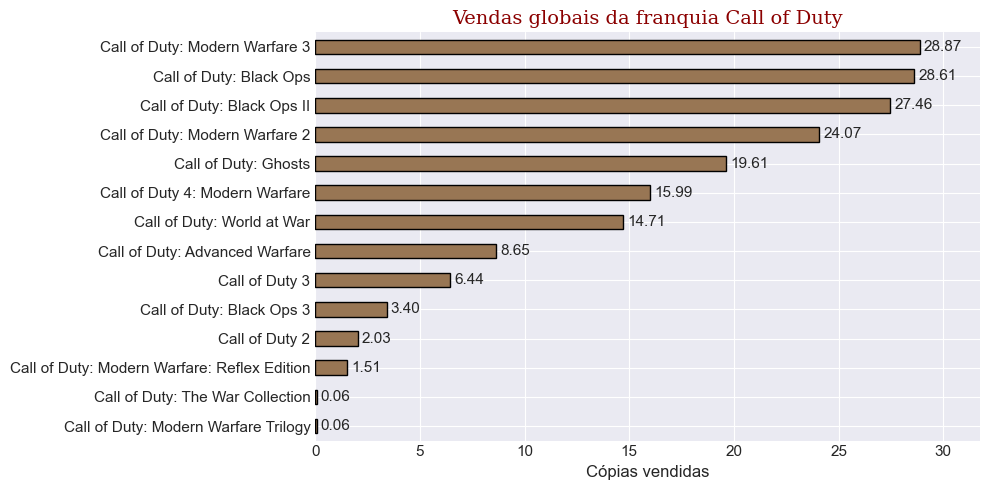

In [39]:
sales = df_cod.groupby('title')['global_sales'].sum().sort_values(ascending=True)
sales.plot(kind='barh', figsize=(10,5), color='#987654', edgecolor='black')
plt.title("Vendas globais da franquia Call of Duty", fontdict=font, fontsize=14)
for i, v in enumerate(sales ):
    plt.text(v + 0.20, i, f"{v:.2f}", va='center', fontsize=11)
plt.xlabel("Cópias vendidas", fontsize=12)
plt.ylabel("") 
plt.yticks(fontsize=11)
plt.tick_params(axis='x', labelsize=11)

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.02, y, f"{width:.2f}", va='center', fontsize=11)

ax = plt.gca()
ax.set_xlim(0, sales.max() * 1.1)
    
plt.tight_layout()
plt.show()

In [40]:
cod_total_global_sales = df_7th_gen[df_7th_gen['title'].str.contains('call of', na=False, case=False)]['global_sales'].sum()
print(f"Total de vendas da franquia Call of Duty: {cod_total_global_sales} milhões de cópias.")

Total de vendas da franquia Call of Duty: 183.69 milhões de cópias.


### Jogos de mundo aberto
Títulos como *Fallout 3* (2008), *Assassin's Creed 2* (2009), *Red Dead Redemption* e *Fallout: New Vegas* em 2010, *Batman: Arkham City* e *The Elder Scrolls V: Skyrim* em 2011, e *Far Cry 3* (2012) alcançaram sucesso crítico e comercial, ajudando assim a popularizar o mundo aberto como um conceito que logo seria usado mais amplamente no design de mais títulos mainstream.

In [41]:
titles = [
    "Fallout 3",
    "Assassin's Creed II",
    "Red Dead Redemption",
    "Fallout: New Vegas",
    "Batman: Arkham City",
    "The Elder Scrolls V: Skyrim",
    "Far Cry 3"
]

selected_games = df_7th_gen[df_7th_gen['title'].isin(titles)]
year_original = selected_games.groupby('title')['year_of_release'].min().rename('year_of_release')
sales_sum = selected_games.groupby('title')['global_sales'].sum().rename('global_sales_combined')
critic_mean = selected_games.groupby('title')['critic_score'].mean().rename('critic_score')
user_mean = selected_games.groupby('title')['user_score'].mean().rename('user_score')

final_df = year_original.to_frame().join([sales_sum, critic_mean, user_mean])
final_df = final_df.sort_values(by='global_sales_combined', ascending=False)
final_df

,year_of_release,global_sales_combined,critic_score,user_score
title,,,,
The Elder Scrolls V: Skyrim,2011,15.20,9.40,7.40
Red Dead Redemption,2010,12.81,9.50,8.90
Assassin's Creed II,2009,10.81,9.05,8.70
Batman: Arkham City,2011,10.21,9.50,8.65
Fallout 3,2008,8.87,9.15,8.25
Fallout: New Vegas,2010,7.16,8.30,7.95
Far Cry 3,2012,6.35,9.05,8.55


### Dark Soul - A franquia que virou um gênero próprio

Enquanto grande parte dos jogos seguia direções reconhecíveis e muitos vinham se tornando mais fáceis e acessíveis ano após ano, dois títulos se destacaram por fazer algo diferente. O primeiro foi *Dark Souls*, lançado em 2011. A desenvolvedora *From Software* já havia impressionado com *Demon's Souls* em 2009 (exclusivo para Playstation 3), mas foi com *Dark Souls* que alcançaram um público mais amplo, oferecendo alta dificuldade, orientação mínima e narrativa indireta, deixando 99% da experiência como pura jogabilidade. Dark Souls quebrou todas as regras sobre como um jogo moderno deveria ser projetado e, ao fazê-lo, criou algo único que cativou muitos jogadores. Logo sua influência se tornou inegável e todo jogo difícil passou a ser comparado a ele.

In [42]:
df_7th_gen[df_7th_gen['title'].str.contains('dark souls', na=False, case=False)][
    ['title', 'platform', 'year_of_release', 'na_sales', 'jp_sales', 'global_sales', 'developer', 'user_score', 'critic_score']
]

,title,platform,year_of_release,na_sales,jp_sales,global_sales,developer,user_score,critic_score
235,Dark Souls,X360,2011,0.64,0.00,0.99,From Software,8.4,8.9
319,Dark Souls II,X360,2014,0.48,0.01,0.74,From Software,7.9,9.1
1356,Dark Souls,PS3,2011,0.75,0.54,2.02,From Software,8.7,8.9
1431,Dark Souls II,PS3,2014,0.40,0.40,1.27,From Software,8.1,9.1


In [43]:
df_7th_gen[df_7th_gen['title'] == ("Demon's Souls")][
    ['title', 'platform', 'year_of_release', 'na_sales', 'jp_sales', 'global_sales', 'developer', 'user_score', 'critic_score']
]

,title,platform,year_of_release,na_sales,jp_sales,global_sales,developer,user_score,critic_score
1371,Demon's Souls,PS3,2009,0.97,0.35,1.82,From Software,8.9,8.9


### Minecraft
Criado por um único desenvolvedor e disponibilizado publicamente online para PC em 2009, Minecraft provou que gráficos simples não impedem sucesso. Sua liberdade de criação e exploração transformou a percepção de videogames.

Minecraft foi lançado no final desta geração, extendendo-se à geração seguinte.

In [44]:
df_7th_gen[df_7th_gen['title'] == "Minecraft"][
    ['title', 'platform', 'year_of_release', 'genre', 'publisher', 
     'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
11,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.70,2.65,0.02,0.81,9.18
1285,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,2.03,2.37,0.00,0.87,5.26


Entre mundos abertos, franquias anuais como *Call of Duty*, jogos desafiadores como *Dark Souls* e fenômenos de inovação como *Minecraft*, a 7ª geração consolidou tendências e dividiu públicos. O forte final de geração da Sony foi coroado com o aclamado *The Last of Us* (2013), enquanto a indústria se preparava para a próxima geração iniciada em 2012.

In [45]:
df_7th_gen[df_7th_gen['title'] == ("The Last of Us")]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1279,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2.41,2.18,0.28,0.99,5.87,9.5,98.0,9.1,8003.0,Naughty Dog,M


## Títulos mais aclamados pelos usuários

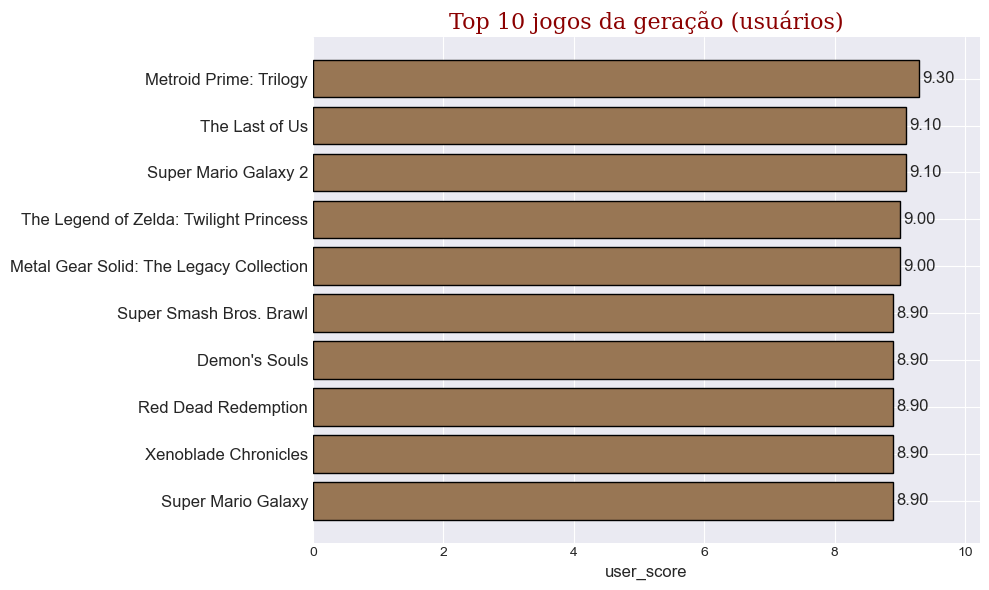

In [46]:
plot_top_rated_score(df_7th_gen, gen7, 'user_score', 'user_count')

## Títulos mais aclamados pela crítica

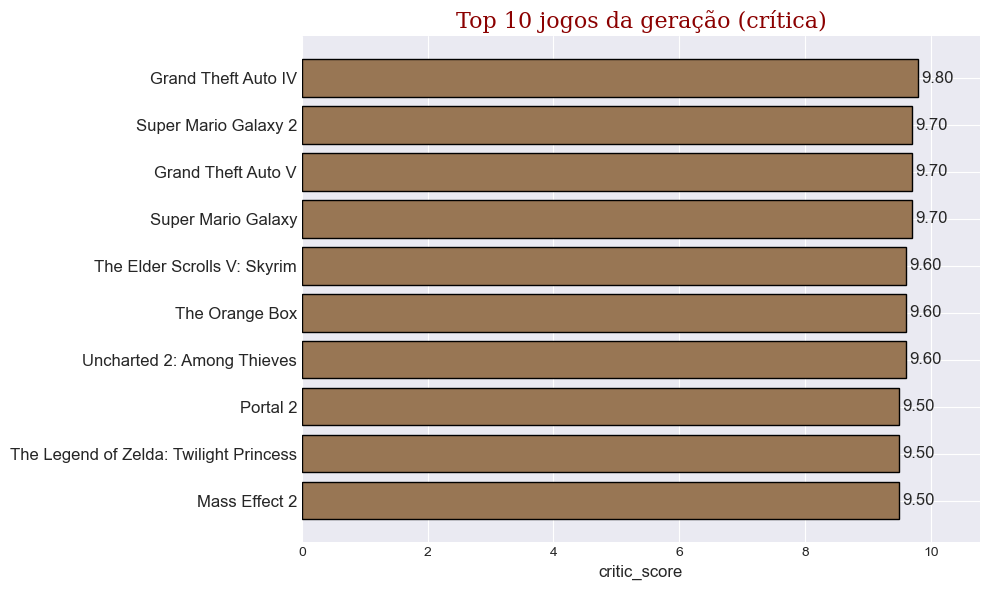

In [47]:
plot_top_rated_score(df_7th_gen, gen7, 'critic_score', 'critic_count')

# Parte 2: Análise comparativa entre os mercados norte-americano e japonês

## Por que comparar América do Norte e Japão?

A América do Norte representa a maior parcela das vendas globais de jogos, enquanto o Japão responde pela menor. Então por que focar a análise nestes dois mercados?
Ambos possuem tradições de consumo que caminham em direções quase opostas. Ao compará-los, podemos investigar como cada empresa lidou com estes públicos de expectativas tão distintas.

## Gráfico de participação de mercado global por região

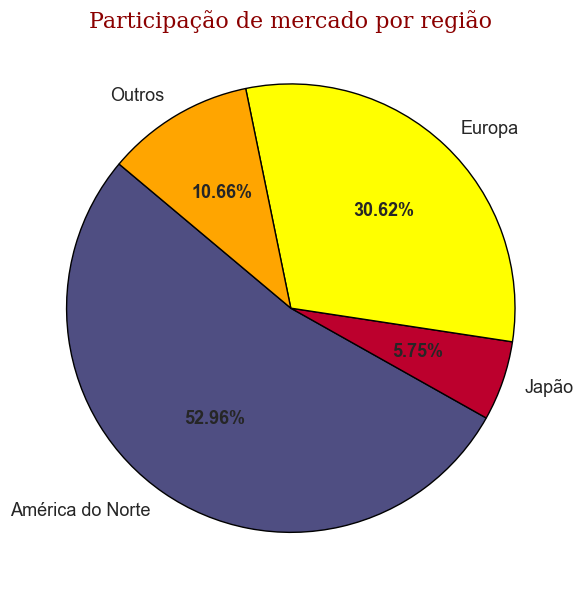

In [48]:
plot_global_market_share_pie_chart(df_7th_gen)

## Participação de mercado em vendas por plataforma e região

O Xbox 360 teve uma penetração extremamente baixa no mercado japonês — o que já havia acontecido com seu antecessor na geração passada — contrastando com seu desempenho dominante na América do Norte, onde liderou as vendas de jogos. Já o Playstation 3 embora tenha sido superado por seus concorrentes no mercado norte-americano, liderou no Japão.

O Wii, por sua vez, ocupou uma posição intermediária tanto no Japão quanto na América do Norte, o que mostra que a estratégia da Nintendo — ao direcionar o console tanto para o público casual quanto como alternativa secundária para jogadores mais engajados — surtiu efeito em termos de alcance e penetração regional.

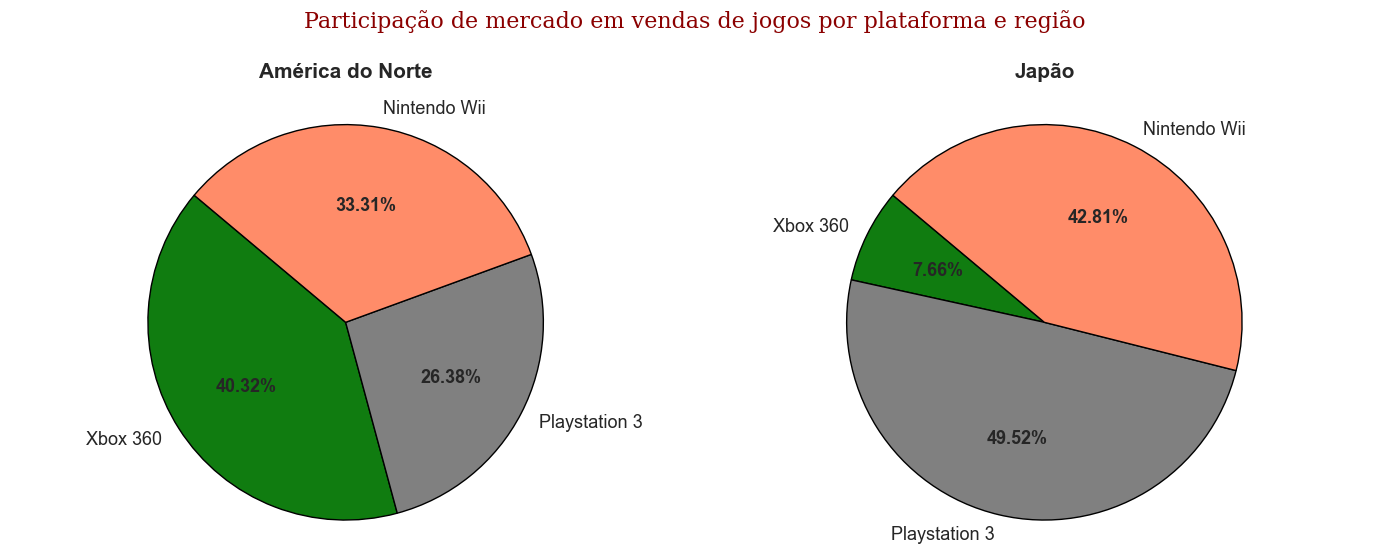

In [49]:
selected_regions = list(region_info.keys())[:2]
plot_region_market_share_pie_charts(df_7th_gen, gen7, selected_regions)

## Distribuição de vendas por região

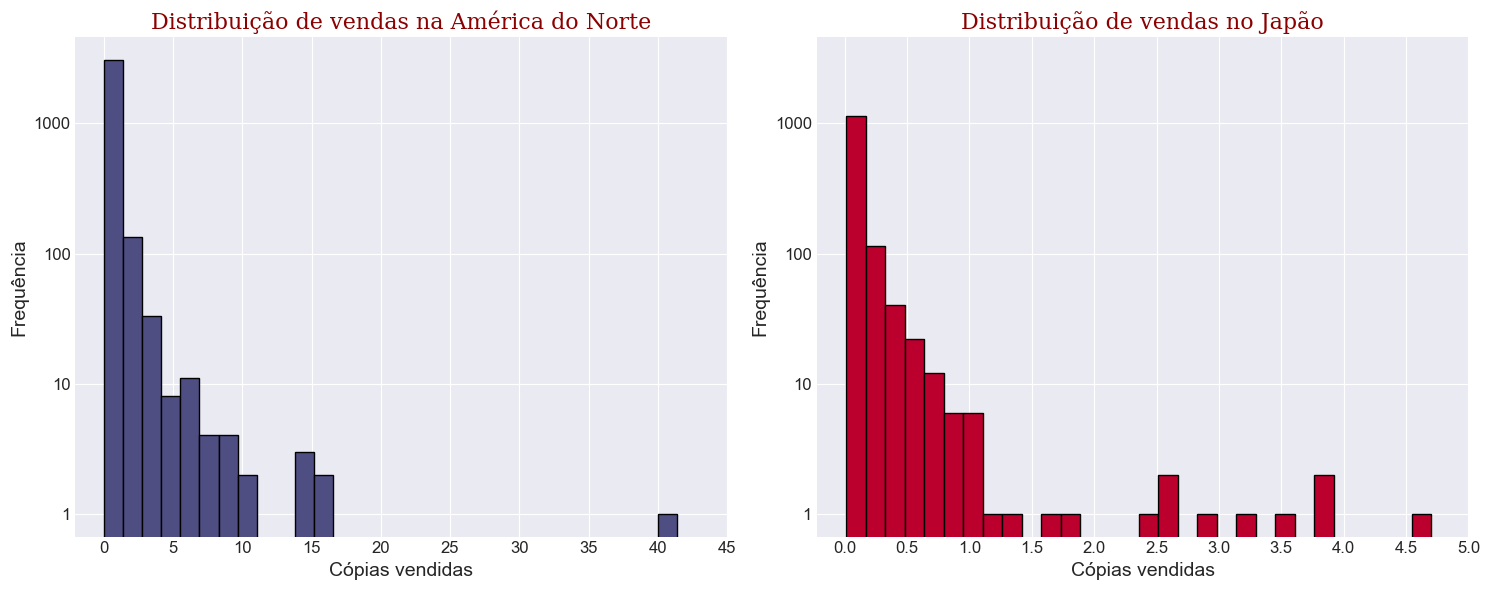

In [50]:
plot_sales_histograms(df_7th_gen, selected_regions)

## Distribuição de vendas por região e plataforma

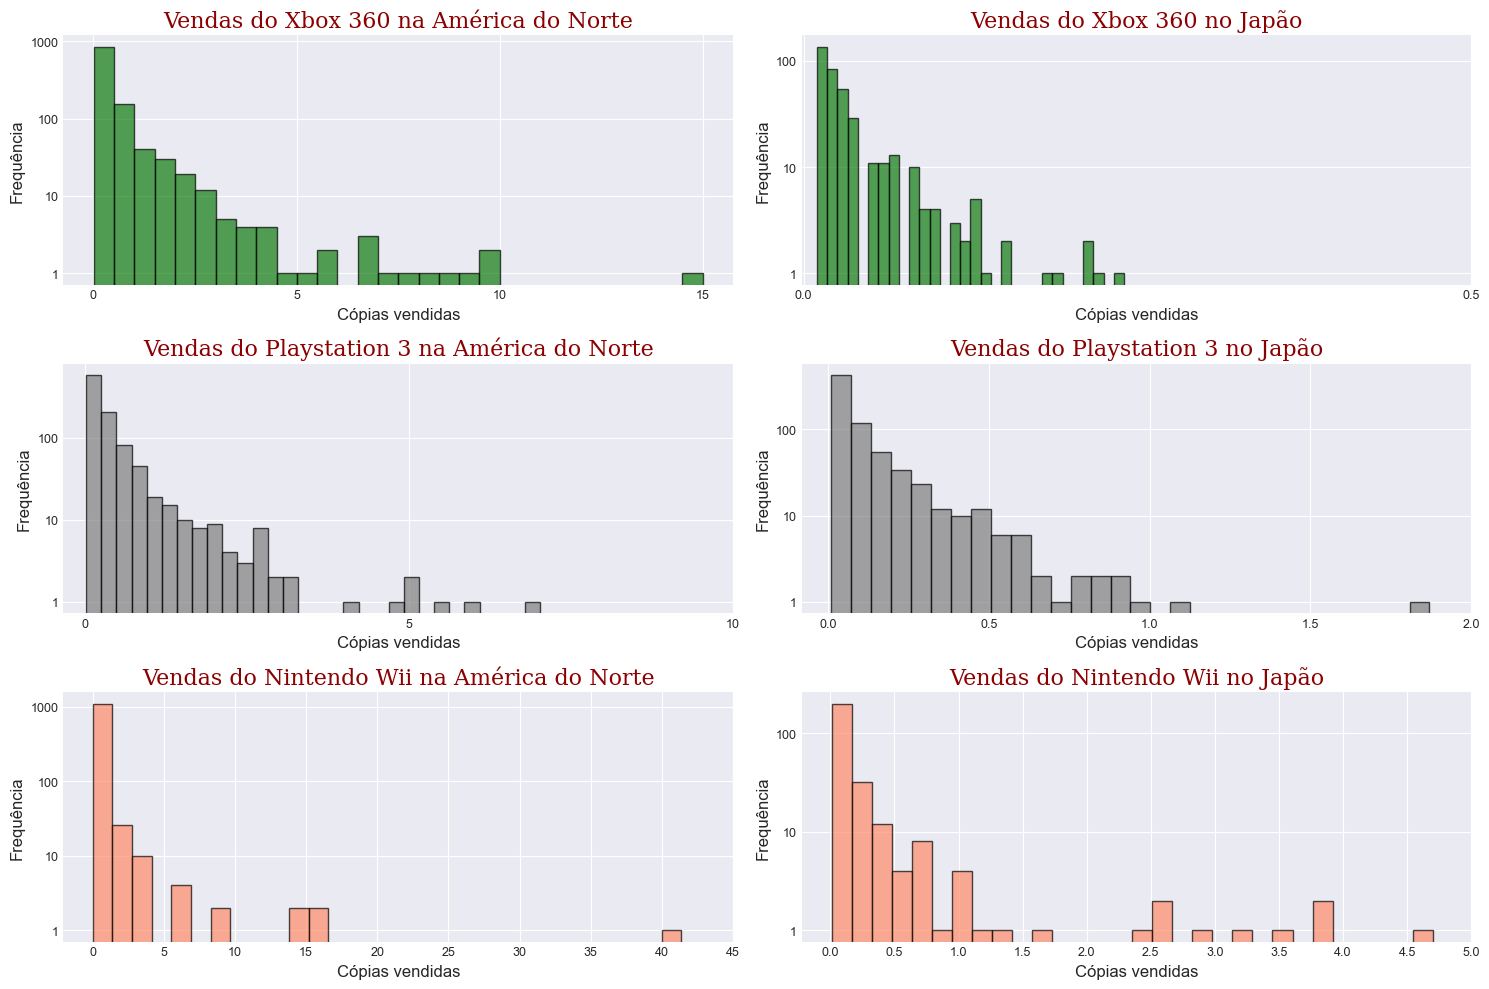

In [51]:
plot_platform_sales_histograms(df_7th_gen, gen7, selected_regions)

### Que título é este, tão isolado, que superou 40 milhões de cópias vendidas na América do Norte?

Apesar de ser o título mais vendido na América do Norte, *Wii Sports* teve um *critic_score* de 7.6, indicando que a crítica percebeu limitações na profundidade da jogabilidade. Porém, sua simplicidade funcionou como uma introdução eficaz ao controle de movimento, atraindo novos jogadores — o que se reflete em um *user_score* um pouco mais alto.

In [52]:
df_7th_gen[df_7th_gen['na_sales'] > 40]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
2589,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8.0,322.0,Nintendo,E


<img src="../images/wii_sports.jpg" width="20%">

### No Japão, também temos um campeão de vendas isolado

*New Super Mario Bros. Wii*, o primeiro título da clássica série da Nintendo para o Wii.

In [53]:
df_7th_gen[df_7th_gen['jp_sales'] > 4]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
2593,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.7,2.24,28.32,8.7,80.0,8.4,594.0,Nintendo,E


<img src="../images/sm_wii_jp.png" width="20%">

## Quais foram os jogos mais vendidos nestas regiões?

No Japão, a Nintendo dominou os primeiros lugares, emplacando nove jogos exclusivos entre os dez mais vendidos — sendo a desenvolvevedora de sete deles. Temos uma boa diversidade de gêneros em ambas regiões, sendo que RPG aparece na 10ª posição com *Final Fantasy XIII* — da também japonesa Square Enix — algo que não acontece na América do Norte. Em compensação temos a ausência de *shooters*, que por sua vez teve uma forte presença na América do Norte. Com destaque para a franquia *Call of Duty*, que emplacou três títulos no top 10. A *Nintendo* aparece em peso com cinco títulos exclusivos, enquanto a *Microsoft Game Studios* figura apenas uma vez. Nenhum título publicado pela *Sony Computer Entertainment* aparece entre os mais vendidos.

Outro dado interessante, é *Grand Theft Auto V* — da famosa franquia GTA — não figurar no top 10 japonês.

### Jogos mais vendidos na América do Norte

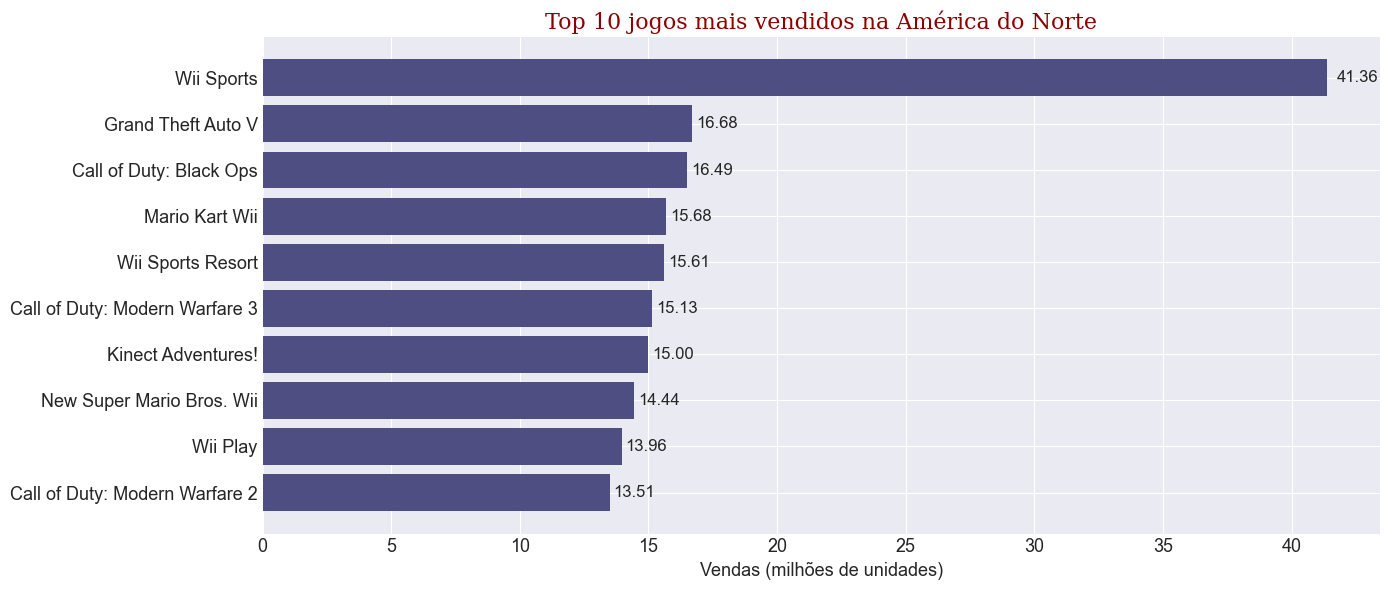

In [54]:
plot_top_games_by_region(df_7th_gen, 'na_sales')

### Jogos mais vendidos no Japão

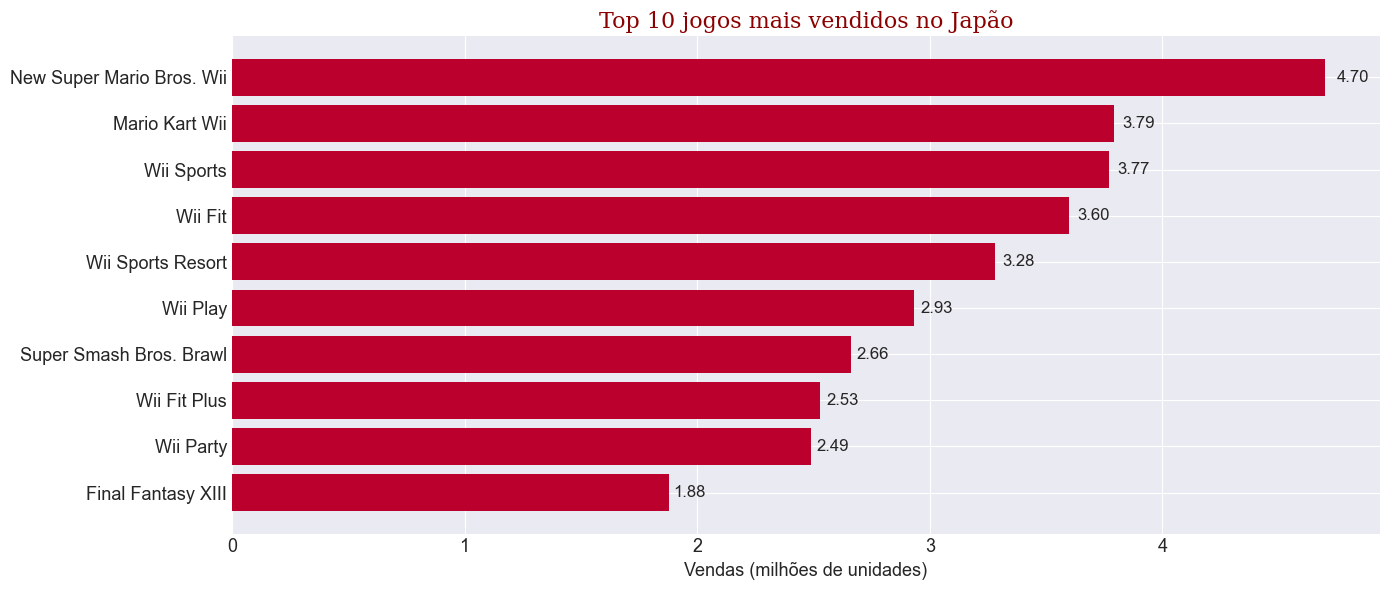

In [55]:
plot_top_games_by_region(df_7th_gen, 'jp_sales')

In [56]:
display_top_10_games(df_7th_gen, selected_regions)


Top 10 jogos mais vendidos da 7ª geração na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Wii Sports,41.36,Nintendo,Nintendo,Sports,E,7.6,8.0
2,Grand Theft Auto V,16.68,Take-Two Interactive,Rockstar North,Action,M,9.7,8.1
3,Grand Theft Auto V,16.68,Take-Two Interactive,Rockstar North,Action,M,9.7,8.2
4,Call of Duty: Black Ops,16.49,Activision,Treyarch,Shooter,M,8.7,6.3
5,Call of Duty: Black Ops,16.49,Activision,Treyarch,Shooter,M,8.8,6.4
6,Call of Duty: Black Ops,16.49,Activision,Treyarch,Shooter,M,8.0,5.8
7,Mario Kart Wii,15.68,Nintendo,Nintendo,Racing,E,8.2,8.3
8,Wii Sports Resort,15.61,Nintendo,Nintendo,Sports,E,8.0,8.0
9,Call of Duty: Modern Warfare 3,15.13,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.4
10,Call of Duty: Modern Warfare 3,15.13,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.2



Top 10 jogos mais vendidos da 7ª geração no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,New Super Mario Bros. Wii,4.70,Nintendo,Nintendo,Platform,E,8.7,8.4
2,Mario Kart Wii,3.79,Nintendo,Nintendo,Racing,E,8.2,8.3
3,Wii Sports,3.77,Nintendo,Nintendo,Sports,E,7.6,8.0
4,Wii Fit,3.60,Nintendo,Nintendo,Sports,E,8.0,7.7
5,Wii Sports Resort,3.28,Nintendo,Nintendo,Sports,E,8.0,8.0
6,Wii Play,2.93,Nintendo,Nintendo,Misc,E,5.8,6.6
7,Super Smash Bros. Brawl,2.66,Nintendo,Game Arts,Fighting,T,9.3,8.9
8,Wii Fit Plus,2.53,Nintendo,Nintendo,Sports,E,8.0,7.4
9,Wii Party,2.49,Nintendo,Nd Cube,Misc,E,6.8,7.4
10,Final Fantasy XIII,1.88,Square Enix,Square Enix,Role-Playing,T,8.2,6.3


## Quais foram os jogos mais vendidos em cada plataforma nestas regiões?

Novamente, vemos a preferência do público norte-americano por *Shooters*. Dominando o Top 10 de Xbox 360 e PlayStation 3. A franquia *Call of Duty* é muito popular nesta região. Com isso a maioria dos títulos possuem classificação *Mature*.

*Kinect Adventures!* Aparece na primeira posição tanto na América do Norte quanto no Japão para Xbox 360 — embora seja o único game que utiliza o periférico Kinect a constar no Top 10.

Curiosamente, no top 10 japonês apenas um game de *Shooter* está presente: *Resident Evil 6*, no *Playstation 3*. Título da clássica série de *Survival Horror*, que teve uma recepção baixa tanto pelo público, por mudar seu foco para a ação. Demostrando mesmo assim, o apreço do público japonês pela série — que é desenvolvida pela também japonesa *Capcom*.

Observamos também o gosto dos japoneses pelos chamados *Japanese role-playing games* (jogos de rpg feitos no Japão). 

A franquia *GTA* é popular em ambas as regiões, embora ocupe posições mais altas na América do Norte.

Novamente, no Wii quase todos os títulos mais vendidos são exclusivos e desenvolvidos pela própria Nintendo.

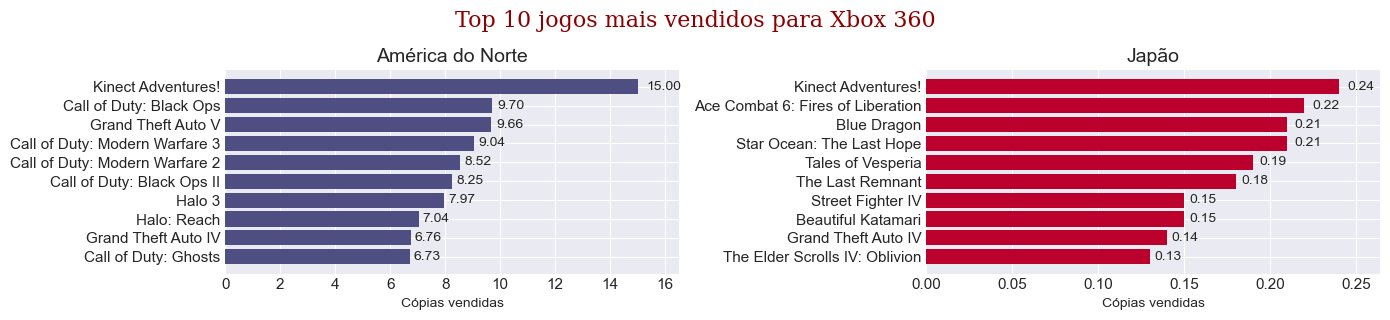

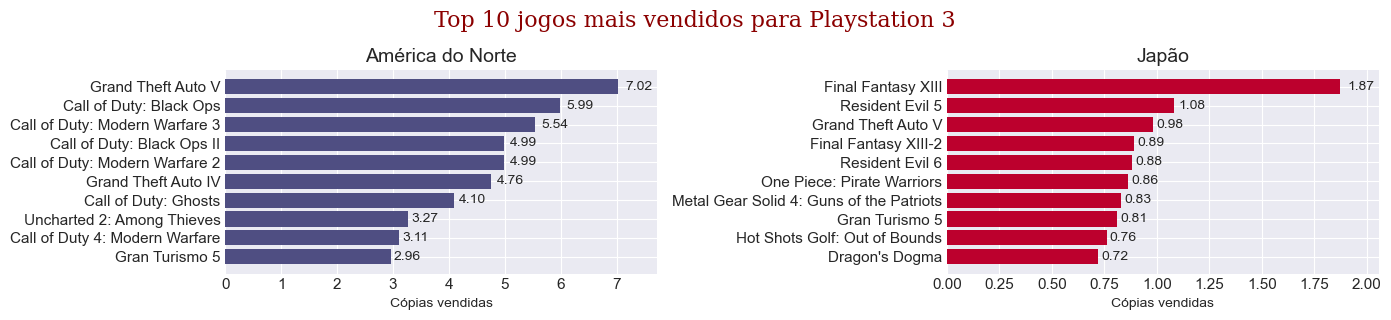

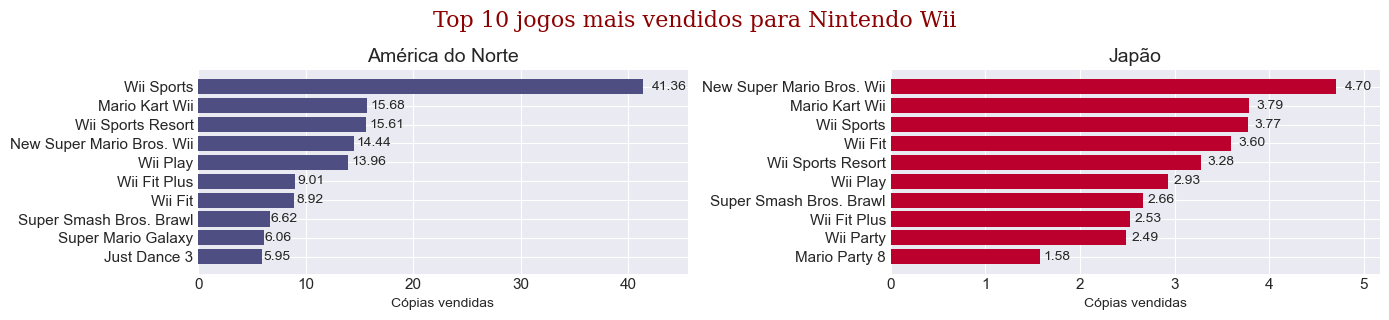

In [57]:
plot_top_games_by_console_and_region(df_7th_gen, platforms, selected_regions, gen7, region_info)

In [58]:
display_top_10_games_by_platform(df_7th_gen, gen7, selected_regions)


Top 10 jogos mais vendidos para Xbox 360 na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Kinect Adventures!,15.00,Microsoft Game Studios,Good Science Studio,Misc,E,6.1,6.3
2,Call of Duty: Black Ops,9.70,Activision,Treyarch,Shooter,M,8.7,6.3
3,Grand Theft Auto V,9.66,Take-Two Interactive,Rockstar North,Action,M,9.7,8.1
4,Call of Duty: Modern Warfare 3,9.04,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.4
5,Call of Duty: Modern Warfare 2,8.52,Activision,Infinity Ward,Shooter,M,9.4,6.3
6,Call of Duty: Black Ops II,8.25,Activision,Treyarch,Shooter,M,8.3,4.8
7,Halo 3,7.97,Microsoft Game Studios,"Bungie Software, Bungie",Shooter,M,9.4,7.8
8,Halo: Reach,7.04,Microsoft Game Studios,Bungie,Shooter,M,9.1,7.9
9,Grand Theft Auto IV,6.76,Take-Two Interactive,Rockstar North,Action,M,9.8,7.9
10,Call of Duty: Ghosts,6.73,Activision,Infinity Ward,Shooter,M,7.3,2.6



Top 10 jogos mais vendidos para Xbox 360 no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,Kinect Adventures!,0.24,Microsoft Game Studios,Good Science Studio,Misc,E,6.1,6.3
2,Ace Combat 6: Fires of Liberation,0.22,Atari,Project Aces,Simulation,T,8.0,7.9
3,Blue Dragon,0.21,Microsoft Game Studios,"Mistwalker, Artoon",Role-Playing,T,7.9,7.8
4,Star Ocean: The Last Hope,0.21,Square Enix,"Square Enix, Tri-Ace",Role-Playing,T,7.2,7.2
5,Tales of Vesperia,0.19,Atari,Bandai Namco Games,Role-Playing,T,7.9,8.2
6,The Last Remnant,0.18,Square Enix,Square Enix,Role-Playing,M,6.6,6.9
7,Street Fighter IV,0.15,Capcom,Capcom,Fighting,T,9.3,7.3
8,Beautiful Katamari,0.15,Namco Bandai Games,Now Production,Puzzle,E,7.3,7.0
9,Grand Theft Auto IV,0.14,Take-Two Interactive,Rockstar North,Action,M,9.8,7.9
10,The Elder Scrolls IV: Oblivion,0.13,Take-Two Interactive,Bethesda Softworks,Role-Playing,M,9.4,8.7



Top 10 jogos mais vendidos para Playstation 3 na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Grand Theft Auto V,7.02,Take-Two Interactive,Rockstar North,Action,M,9.7,8.2
2,Call of Duty: Black Ops,5.99,Activision,Treyarch,Shooter,M,8.8,6.4
3,Call of Duty: Modern Warfare 3,5.54,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.2
4,Call of Duty: Black Ops II,4.99,Activision,Treyarch,Shooter,M,8.3,5.3
5,Call of Duty: Modern Warfare 2,4.99,Activision,Infinity Ward,Shooter,M,9.4,6.3
6,Grand Theft Auto IV,4.76,Take-Two Interactive,Rockstar North,Action,M,9.8,7.5
7,Call of Duty: Ghosts,4.10,Activision,Infinity Ward,Shooter,M,7.1,2.6
8,Uncharted 2: Among Thieves,3.27,Sony Computer Entertainment,Naughty Dog,Action,T,9.6,8.8
9,Call of Duty 4: Modern Warfare,3.11,Activision,Infinity Ward,Shooter,M,9.4,8.4
10,Gran Turismo 5,2.96,Sony Computer Entertainment,Polyphony Digital,Racing,E,8.4,7.5



Top 10 jogos mais vendidos para Playstation 3 no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,Final Fantasy XIII,1.87,Square Enix,Square Enix,Role-Playing,T,8.3,7.3
2,Resident Evil 5,1.08,Capcom,Capcom,Action,M,8.4,7.5
3,Grand Theft Auto V,0.98,Take-Two Interactive,Rockstar North,Action,M,9.7,8.2
4,Final Fantasy XIII-2,0.89,Square Enix,Square Enix,Role-Playing,T,7.9,6.6
5,Resident Evil 6,0.88,Capcom,Capcom,Shooter,M,7.4,5.4
6,One Piece: Pirate Warriors,0.86,Namco Bandai Games,"Omega Force, Tecmo Koei Games",Action,T,6.4,6.5
7,Metal Gear Solid 4: Guns of the Patriots,0.83,Konami Digital Entertainment,Kojima Productions,Action,M,9.4,8.7
8,Gran Turismo 5,0.81,Sony Computer Entertainment,Polyphony Digital,Racing,E,8.4,7.5
9,Hot Shots Golf: Out of Bounds,0.76,Sony Computer Entertainment,Clap Hanz,Sports,E,8.1,8.8
10,Dragon's Dogma,0.72,Capcom,Capcom,Role-Playing,M,7.8,8.3



Top 10 jogos mais vendidos para Nintendo Wii na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Wii Sports,41.36,Nintendo,Nintendo,Sports,E,7.6,8.0
2,Mario Kart Wii,15.68,Nintendo,Nintendo,Racing,E,8.2,8.3
3,Wii Sports Resort,15.61,Nintendo,Nintendo,Sports,E,8.0,8.0
4,New Super Mario Bros. Wii,14.44,Nintendo,Nintendo,Platform,E,8.7,8.4
5,Wii Play,13.96,Nintendo,Nintendo,Misc,E,5.8,6.6
6,Wii Fit Plus,9.01,Nintendo,Nintendo,Sports,E,8.0,7.4
7,Wii Fit,8.92,Nintendo,Nintendo,Sports,E,8.0,7.7
8,Super Smash Bros. Brawl,6.62,Nintendo,Game Arts,Fighting,T,9.3,8.9
9,Super Mario Galaxy,6.06,Nintendo,Nintendo,Platform,E,9.7,8.9
10,Just Dance 3,5.95,Ubisoft,Ubisoft,Misc,E10+,7.4,7.8



Top 10 jogos mais vendidos para Nintendo Wii no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,New Super Mario Bros. Wii,4.70,Nintendo,Nintendo,Platform,E,8.7,8.4
2,Mario Kart Wii,3.79,Nintendo,Nintendo,Racing,E,8.2,8.3
3,Wii Sports,3.77,Nintendo,Nintendo,Sports,E,7.6,8.0
4,Wii Fit,3.60,Nintendo,Nintendo,Sports,E,8.0,7.7
5,Wii Sports Resort,3.28,Nintendo,Nintendo,Sports,E,8.0,8.0
6,Wii Play,2.93,Nintendo,Nintendo,Misc,E,5.8,6.6
7,Super Smash Bros. Brawl,2.66,Nintendo,Game Arts,Fighting,T,9.3,8.9
8,Wii Fit Plus,2.53,Nintendo,Nintendo,Sports,E,8.0,7.4
9,Wii Party,2.49,Nintendo,Nd Cube,Misc,E,6.8,7.4
10,Mario Party 8,1.58,Nintendo,Hudson,Misc,E,6.2,6.3


A análise de exclusivos de cada plataforma por região, reforça a força dos títulos first-party da Nintendo. Praticamente repetindo o resultado da análise dos mais vendidos anteriormente, o que não acontece com as outras plataformas. E reforça ainda mais a diferença de preferência nestes mercados nas plataformas da Microsoft e Sony.

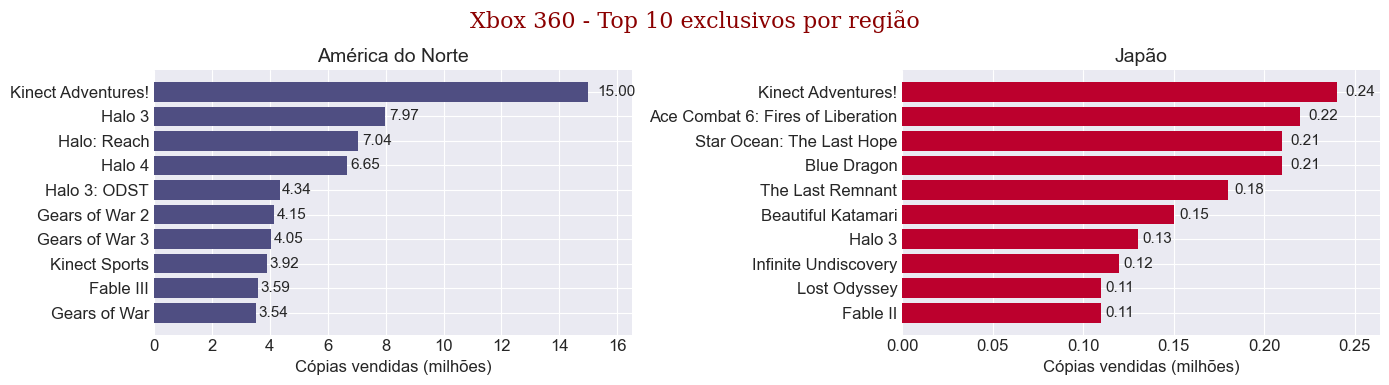

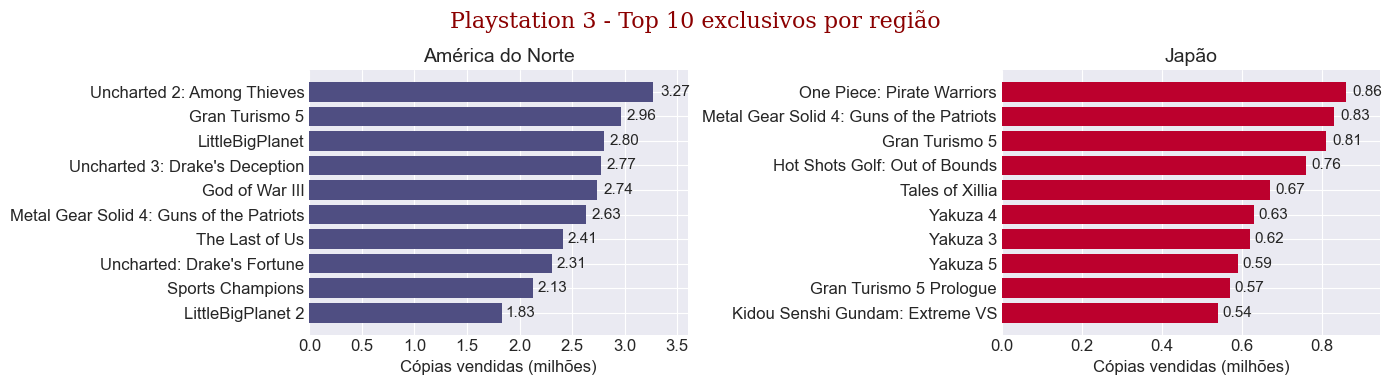

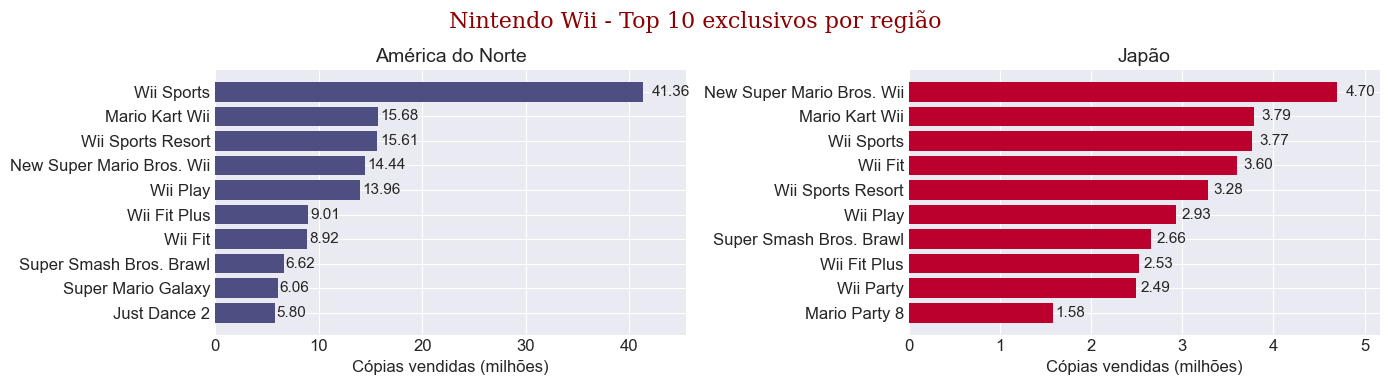

In [59]:
plot_top_exclusives_console_by_region(df_7th_gen, platforms, gen7, selected_regions)

In [60]:
filter_and_print_top_exclusives(df_7th_gen, gen7, selected_regions)


Xbox 360 - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,na_sales,genre,rating
1,Kinect Adventures!,2010,15.00,Misc,E
2,Halo 3,2007,7.97,Shooter,M
3,Halo: Reach,2010,7.04,Shooter,M
4,Halo 4,2012,6.65,Shooter,M
5,Halo 3: ODST,2009,4.34,Shooter,M
6,Gears of War 2,2008,4.15,Shooter,M
7,Gears of War 3,2011,4.05,Shooter,M
8,Kinect Sports,2010,3.92,Sports,E10+
9,Fable III,2010,3.59,Role-Playing,M
10,Gears of War,2006,3.54,Shooter,M



Xbox 360 - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,jp_sales,genre,rating
1,Kinect Adventures!,2010,0.24,Misc,E
2,Ace Combat 6: Fires of Liberation,2007,0.22,Simulation,T
3,Star Ocean: The Last Hope,2009,0.21,Role-Playing,T
4,Blue Dragon,2006,0.21,Role-Playing,T
5,The Last Remnant,2008,0.18,Role-Playing,M
6,Beautiful Katamari,2007,0.15,Puzzle,E
7,Halo 3,2007,0.13,Shooter,M
8,Infinite Undiscovery,2008,0.12,Role-Playing,T
9,Lost Odyssey,2007,0.11,Role-Playing,T
10,Fable II,2008,0.11,Role-Playing,M



Playstation 3 - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,na_sales,genre,rating
1,Uncharted 2: Among Thieves,2009,3.27,Action,T
2,Gran Turismo 5,2010,2.96,Racing,E
3,LittleBigPlanet,2008,2.80,Platform,E
4,Uncharted 3: Drake's Deception,2011,2.77,Action,T
5,God of War III,2010,2.74,Action,M
6,Metal Gear Solid 4: Guns of the Patriots,2008,2.63,Action,M
7,The Last of Us,2013,2.41,Action,M
8,Uncharted: Drake's Fortune,2007,2.31,Action,T
9,Sports Champions,2010,2.13,Sports,E10+
10,LittleBigPlanet 2,2011,1.83,Platform,E



Playstation 3 - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,jp_sales,genre,rating
1,One Piece: Pirate Warriors,2012,0.86,Action,T
2,Metal Gear Solid 4: Guns of the Patriots,2008,0.83,Action,M
3,Gran Turismo 5,2010,0.81,Racing,E
4,Hot Shots Golf: Out of Bounds,2007,0.76,Sports,E
5,Tales of Xillia,2011,0.67,Role-Playing,T
6,Yakuza 4,2010,0.63,Action,M
7,Yakuza 3,2009,0.62,Action,M
8,Yakuza 5,2012,0.59,Action,M
9,Gran Turismo 5 Prologue,2007,0.57,Racing,E
10,Kidou Senshi Gundam: Extreme VS,2011,0.54,Fighting,NaN



Nintendo Wii - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,na_sales,genre,rating
1,Wii Sports,2006,41.36,Sports,E
2,Mario Kart Wii,2008,15.68,Racing,E
3,Wii Sports Resort,2009,15.61,Sports,E
4,New Super Mario Bros. Wii,2009,14.44,Platform,E
5,Wii Play,2006,13.96,Misc,E
6,Wii Fit Plus,2009,9.01,Sports,E
7,Wii Fit,2007,8.92,Sports,E
8,Super Smash Bros. Brawl,2008,6.62,Fighting,T
9,Super Mario Galaxy,2007,6.06,Platform,E
10,Just Dance 2,2010,5.80,Misc,E10+



Nintendo Wii - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,jp_sales,genre,rating
1,New Super Mario Bros. Wii,2009,4.70,Platform,E
2,Mario Kart Wii,2008,3.79,Racing,E
3,Wii Sports,2006,3.77,Sports,E
4,Wii Fit,2007,3.60,Sports,E
5,Wii Sports Resort,2009,3.28,Sports,E
6,Wii Play,2006,2.93,Misc,E
7,Super Smash Bros. Brawl,2008,2.66,Fighting,T
8,Wii Fit Plus,2009,2.53,Sports,E
9,Wii Party,2010,2.49,Misc,E
10,Mario Party 8,2007,1.58,Misc,E


## Analisando preferência de gêneros destes mercados

A análise por gênero revela diferenças estruturais tanto na oferta de jogos quanto na demanda regional. Nos consoles da Microsoft e da Sony, os gêneros *Action*, *Sports* e *Shooter* formam o núcleo da biblioteca — justamente os gêneros que lideram as vendas na América do Norte, juntos representando mais de 50% do mercado.
O console da Nintendo, embora também tenha forte presença de *Action* e *Sports*, se diferencia pelo peso do gênero *Misc*, gênero este dominado por títulos que exploram controles de movimento (ex.: Wii Sports, Wii Fit, Just Dance).
Do lado da demanda, as diferenças culturais ficam ainda mais nítidas: no Japão, *Role-Playing* ocupa a terceira posição, enquanto *Shooter* cai para a 5ª posição. Além de presença mais relevante de *Platform* e *Fighting*.

## Quantos títulos de cada gênero foram lançados por console?

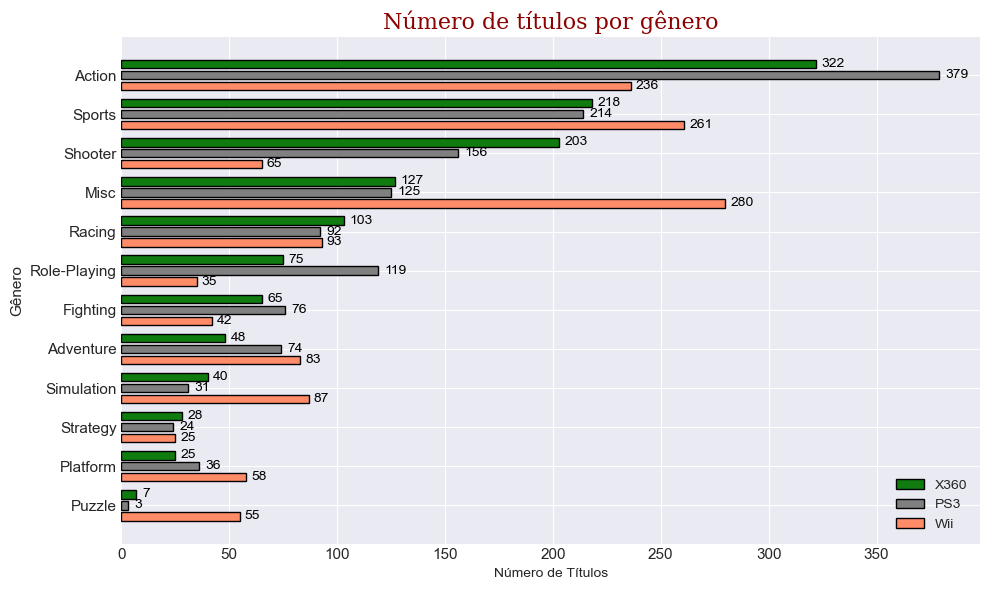

In [61]:
plot_titles_by_genre(df_7th_gen, gen7)

## Quais foram os gêneros mais vendidos por região?

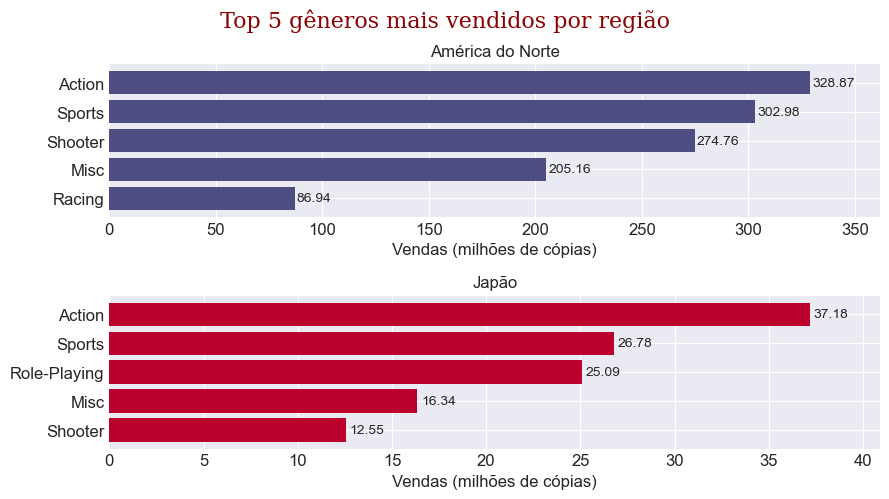

In [62]:
plot_top_genres_by_region(df_7th_gen, selected_regions, region_info)

## Quais foram os gêneros mais vendidos por plataforma nestas regiões?

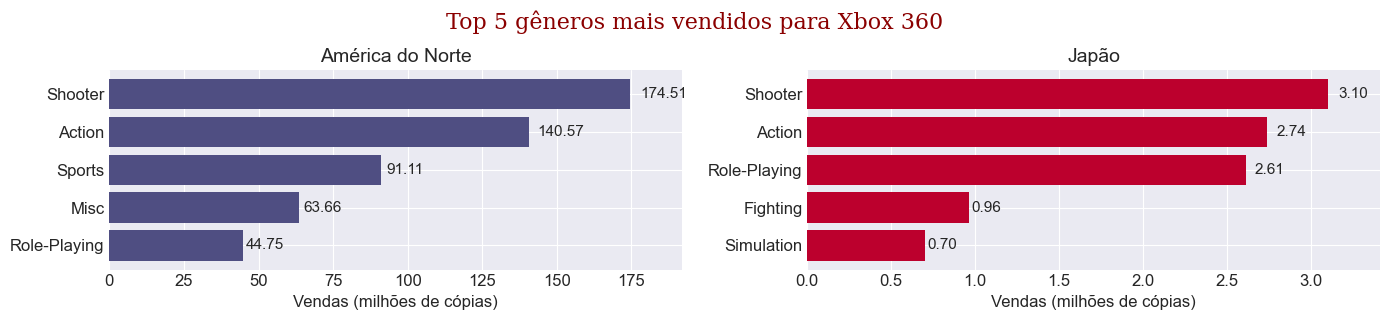

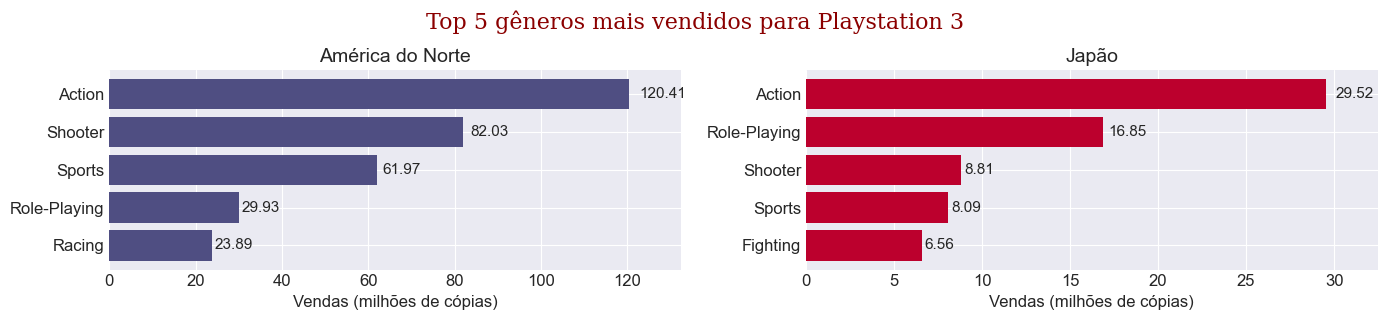

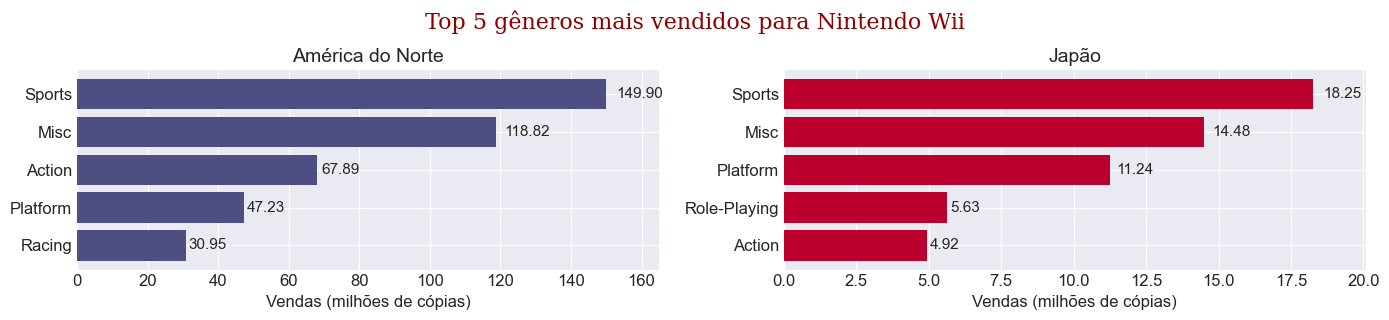

In [63]:
plot_top_genres_by_console_and_region(df_7th_gen, gen7, selected_regions)

## Qual foi a parcela de vendas de cada gênero nestes mercados?

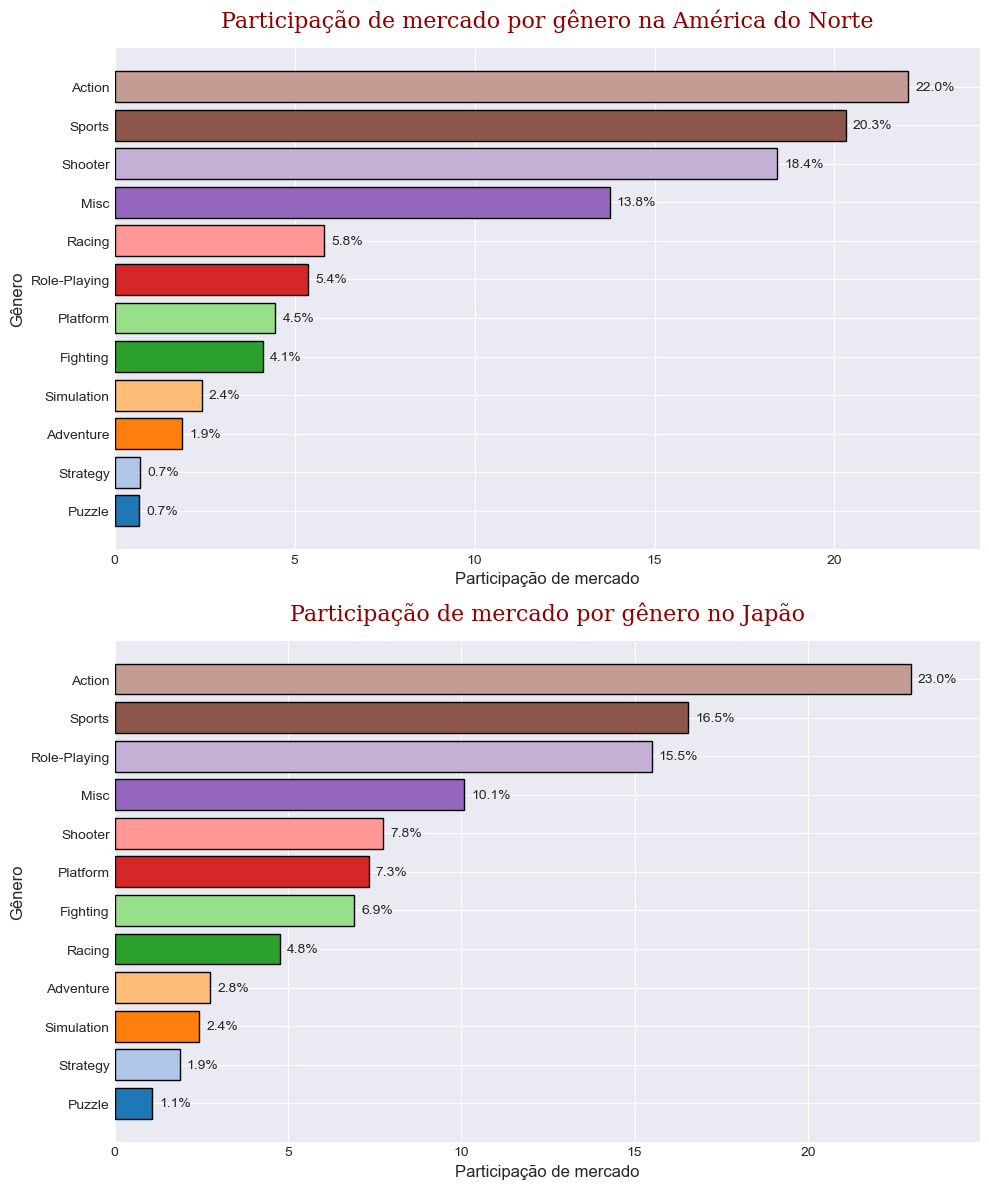

In [64]:
plot_market_share_by_genre(df_7th_gen, selected_regions, region_info)

## Quais foram os títulos mais vendidos de cada gênero nestes mercados?

### Action

*Grand Theft Auto V* lidera as vendas em ambas regiões, porém os rankings revelam direções de consumo distintas.

Na América do Norte, o gênero é dominado por produções ocidentais de grande orçamento — *GTA IV*, *Red Dead Redemption*, a trilogia *Assassin’s Creed* e os jogos da série *Batman: Arkham*. São títulos de mundo aberto ou ação-aventura com forte foco narrativo e estética cinematográfica, refletindo o peso destas franquias no mercado ocidental.

Porém, no Japão a lista assume um tom claramente doméstico: além de *Resident Evil 5* (produção japonesa de alcance global), o ranking é repleto de títulos de ação fortemente associados à cultura pop japonesa, como *One Piece: Pirate Warriors*, *Yakuza* 3 e 4 e *Sengoku Basara: Samurai Heroes*. Até mesmo *Fist of the North Star: Ken’s Rage e Warriors Orochi 3* pertencem a um subgênero específico (musou) muito popular no Japão, mas de nicho no ocidente.

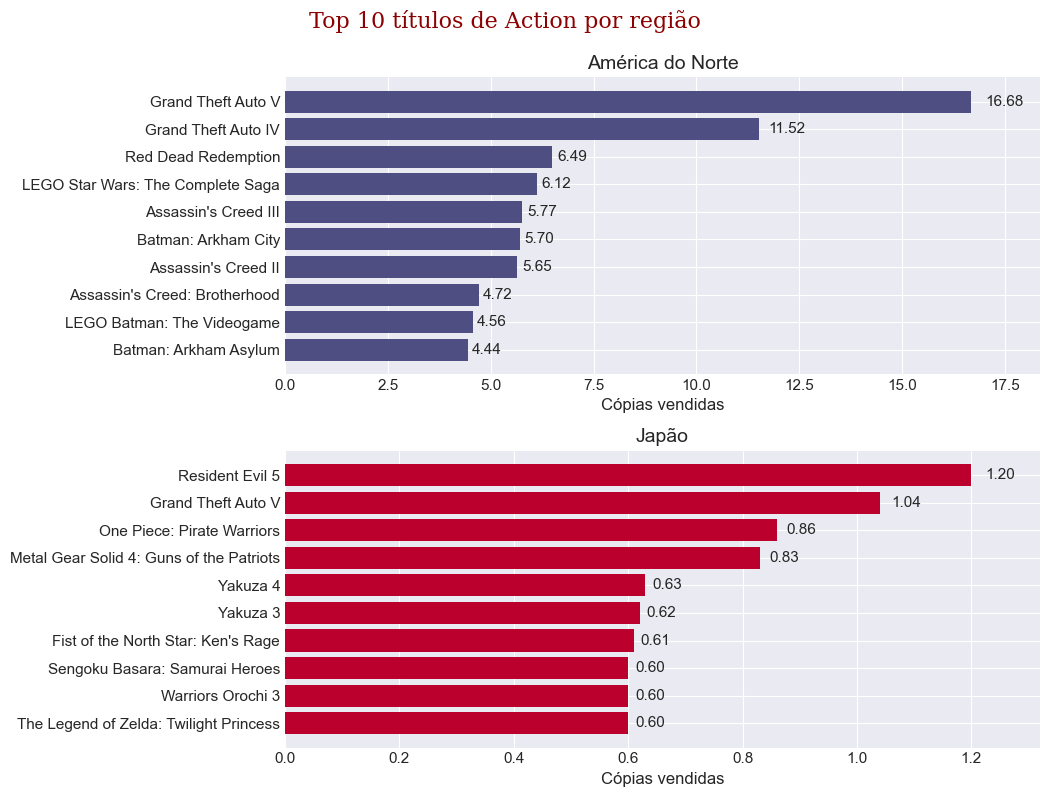

In [65]:
plot_top_titles_by_region(df_7th_gen, 'Action', region_info, selected_regions)

### Sports
Títulos de esporte são populares em ambas regiões, mas há uma clara diferença de preferência.
Os japoneses rejeitam as franquias de esportes tipicamente norte-americanos como NFL e NBA. Dando preferência a franquia de futebol *Pro Evolution Soccer*, desenvolvida pela japonesa *Konami*.
Títulos de esportes do Nintendo Wii se destacam em ambas regiões.

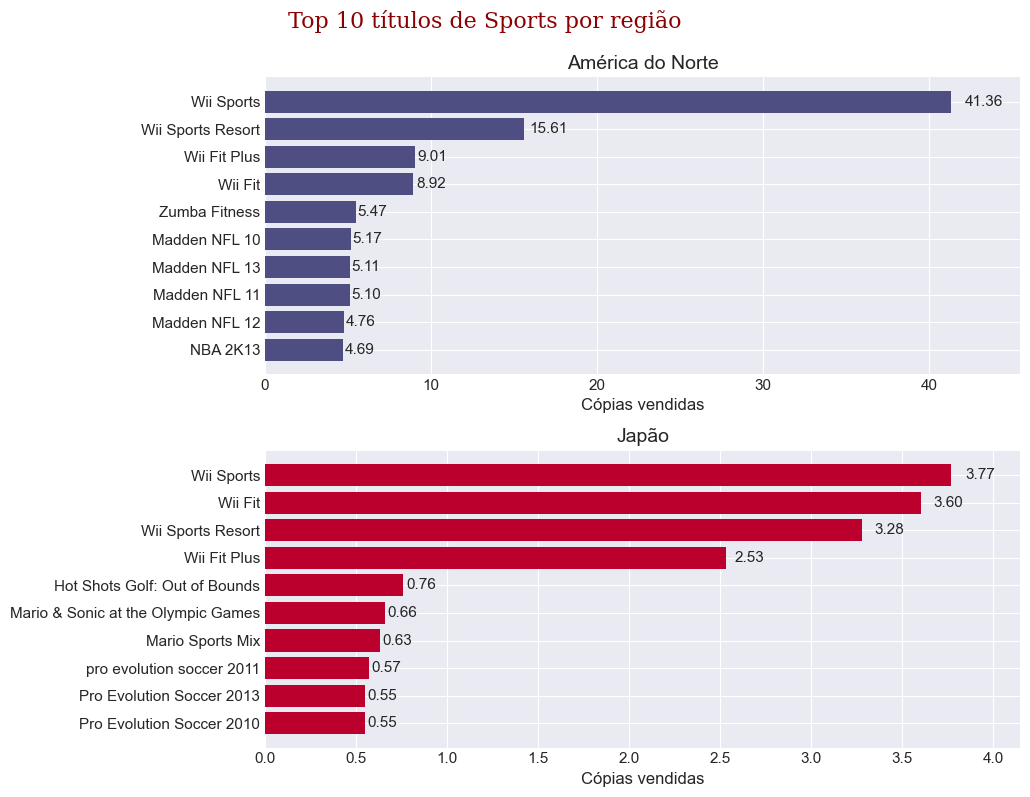

In [66]:
plot_top_titles_by_region(df_7th_gen, 'Sports', region_info, selected_regions)

### Fighting
Os títulos das primeiras posições se repetem, mas o restante do ranking revela diferenças marcantes de preferência.

Nos Estados Unidos, dois games da série *Mortal Kombat* aparecem entre os mais vendidos, assim como títulos de luta baseados em esportes de combate reais — como UFC e Fight Night. Isso sugere um público mais atraído por experiências de combate “realista” ou associadas ao entretenimento televisivo (MMA, boxe, WWE).

Já no Japão, esses subgêneros praticamente desaparecem do Top 10, substituídos por jogos inspirados em franquias de anime e mangá, como *Gundam*, *JoJo’s Bizarre Adventure* e *Dragon Ball Z*. A presença de *Persona 4 Arena* reforça o peso de títulos que oferecem não apenas luta, mas também narrativa e apelo estético voltado ao público otaku.

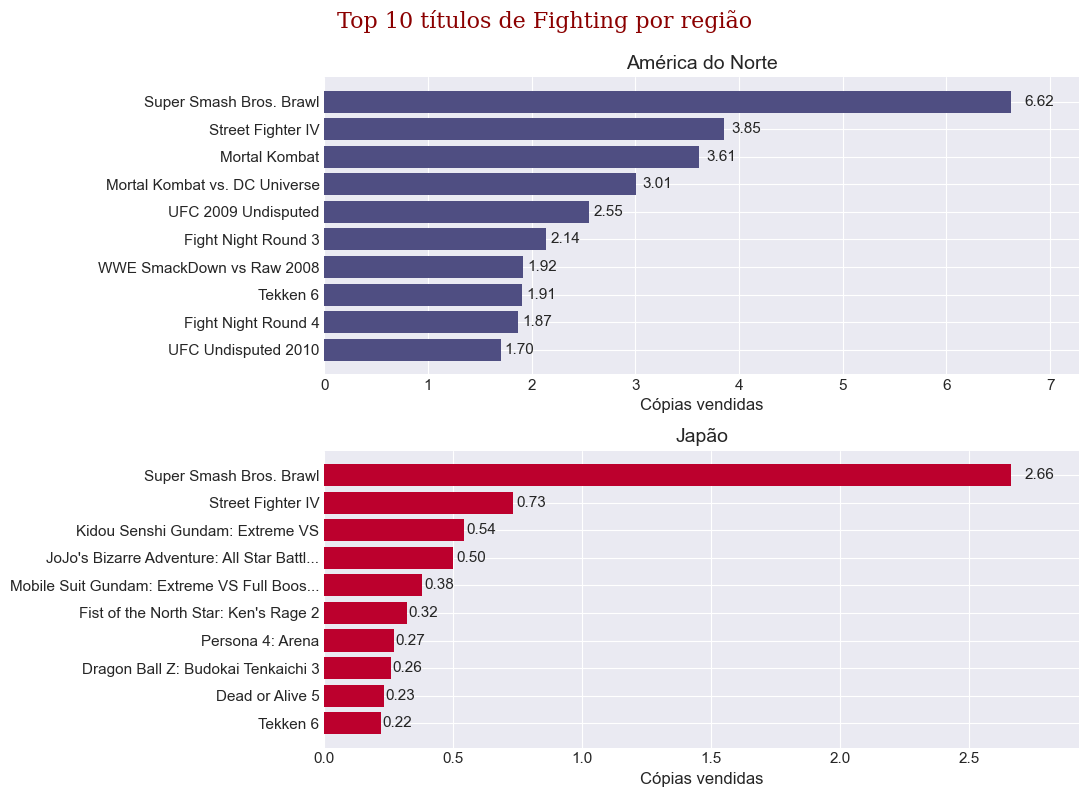

In [67]:
plot_top_titles_by_region(df_7th_gen, 'Fighting', region_info, selected_regions)

### RPG

Embora Final Fantasy XIII encontre público fora do Japão, temos um nítido constraste, pois o mercado japonês é quase inteiramente dominado por JRPGs, já na América do Norte o domínio é de RPGs ocidentais 

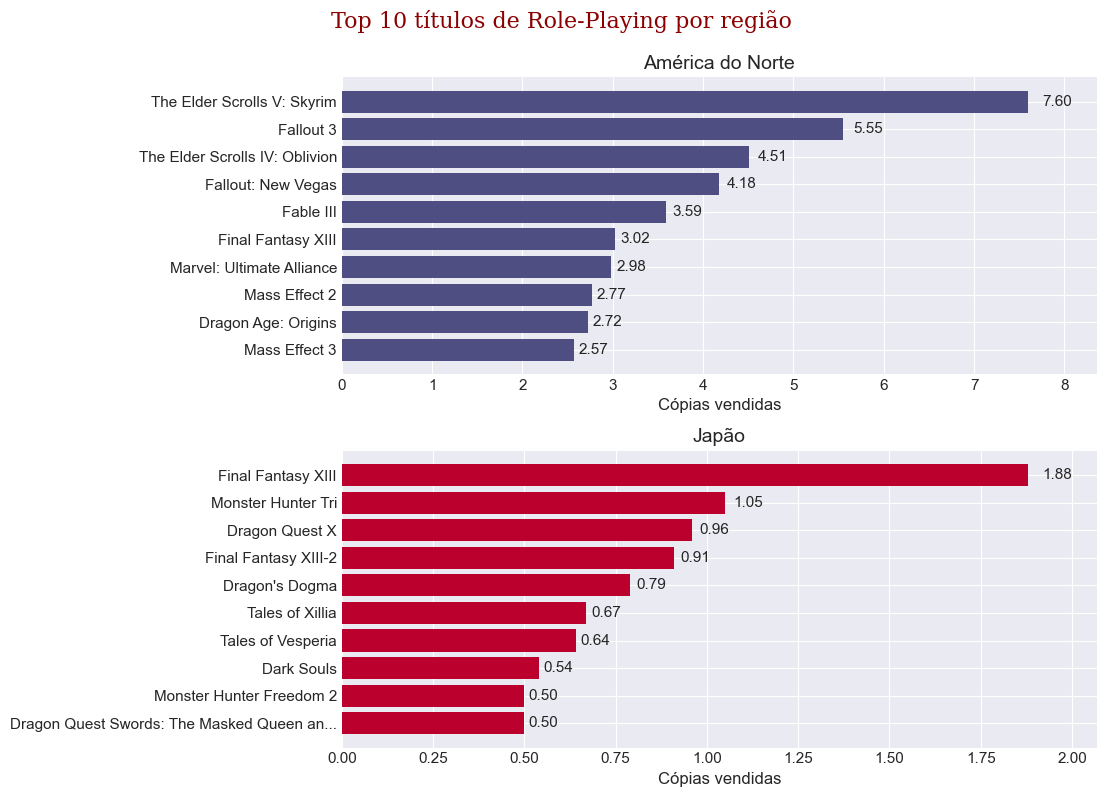

In [68]:
plot_top_titles_by_region(df_7th_gen, 'Role-Playing', region_info, selected_regions)

## Análise de preferência por publishers

### Listando títulos que possuem valores nulos em 'publisher'

In [69]:
publisher_nan = df_7th_gen[df_7th_gen['publisher'].isna()]
list(publisher_nan['title'])

['World of Tanks',
 'AKB1/48: Idol to Guam de Koishitara...',
 'Brothers in Arms: Furious 4',
 'Monster Hunter Frontier Online',
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku',
 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)']

### Atualizando o campo 'publisher' destes títulos

In [70]:
update_publisher(df_7th_gen, 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'Spike')
update_publisher(df_7th_gen, 'Monster Hunter Frontier Online', 'Capcom') 
update_publisher(df_7th_gen, 'World of Tanks', 'Wargaming') 
update_publisher(df_7th_gen, 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku', '07th Expansion') 
update_publisher(df_7th_gen, 'AKB1/48: Idol to Guam de Koishitara...', 'Illusion') 
update_publisher(df_7th_gen, 'Brothers in Arms: Furious 4', 'Gearbox Software')

In [71]:
df_7th_gen['publisher'].isnull().sum()

0

## Quais publishers mais vendem por região?

O mercado norte-americano é concentrado em grandes publishers ocidentais como *EA*, *Activision*, *Ubisoft* e *Take-Two*.
No Japão, o cenário é mais nacionalista, a *Nintendo* responde por uma fatia desproporcionalmente grande das vendas, seguida por publishers tradicionais japonesas como *Namco Bandai*, *Capcom* e *Square Enix*, fortemente associadas a *JRPGs* e *fighting games*.

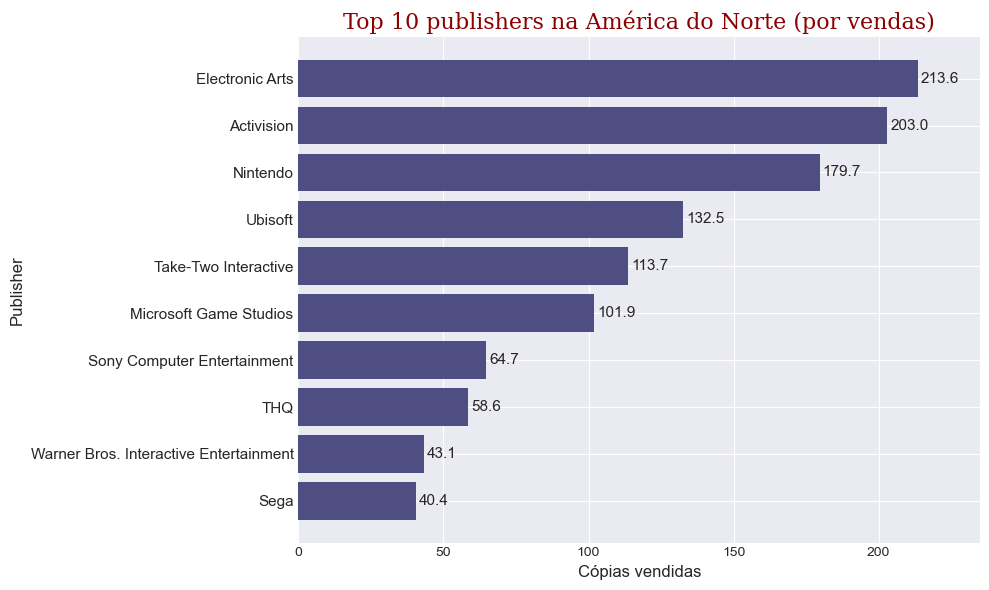

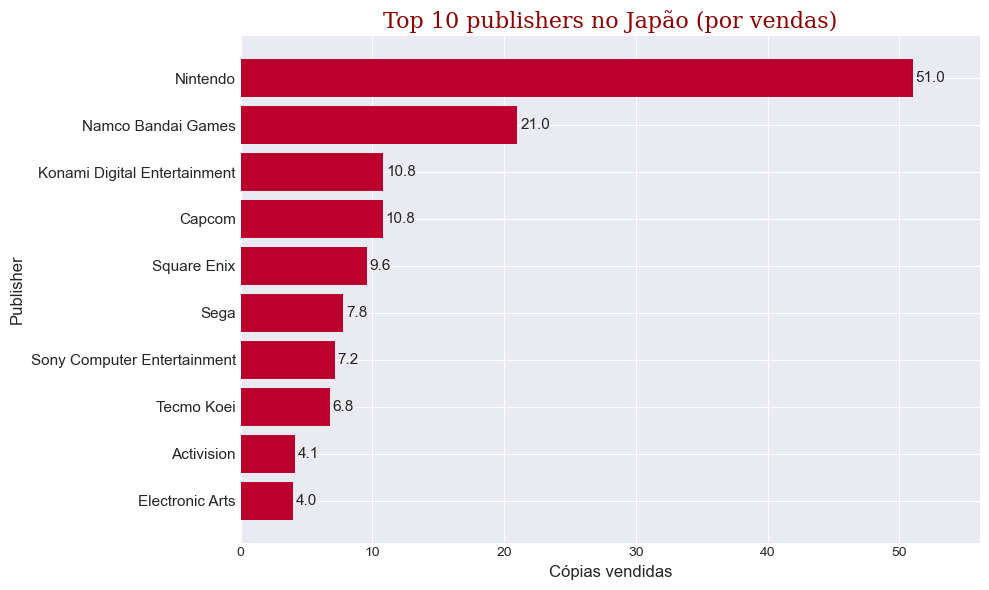

In [72]:
plot_top_publishers_by_region(df_7th_gen, selected_regions)

A relação entre publishers e gêneros reforça um padrão regional. A EA se concentra em *Sports*, a Activision em *Shooters*, enquanto a Square Enix, Atlus e Namco Bandai são quase monotemáticas em *JRPGs* — o que garante sua força no mercado japonês, mas limita sua penetração no ocidente.

Publishers como Ubisoft e Warner apostam em catálogos mais diversificados, conseguindo atingir diferentes segmentos de público.

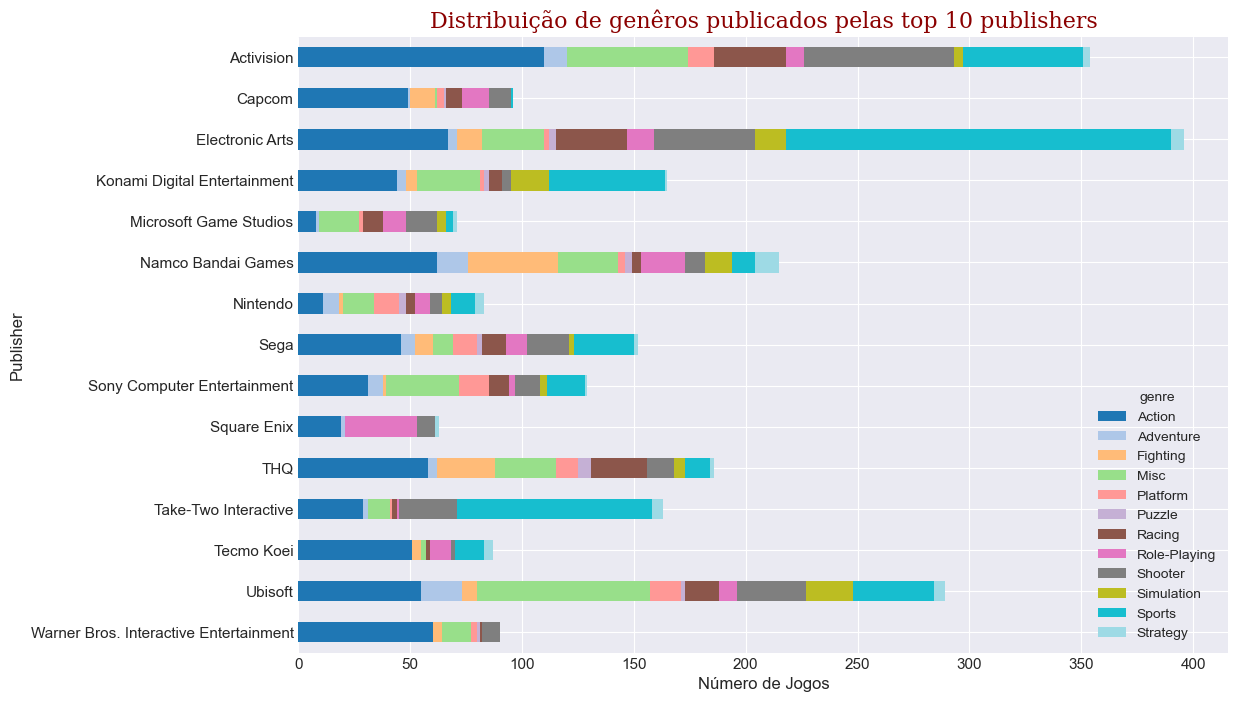

In [73]:
plot_genres_count_by_publishers_global(df_7th_gen)

## Distribuição e vendas por classificação etária

### Lidando com valore nulos em 'rating'
Títulos sem valores nulos tendem a vender mais, e valores nulos provavelmente representam títulos menos populares ou menos documentados. Resolvi então remover os títulos com valores nulos nas análises a seguir.

In [74]:
median_not_null = df_7th_gen[df_7th_gen['rating'].notnull()]['global_sales']
median_null = df_7th_gen[df_7th_gen['rating'].isnull()]['global_sales']

stats_df = pd.DataFrame({
    'Grupo': ['Sem valores nulos', 'Com valores nulos'],
    'Mediana': [median_not_null.median(), median_null.median()],
    'Média': [median_not_null.mean(), median_null.mean()],
    'Desvio Padrão': [median_not_null.std(), median_null.std()],
    'Quantidade de Jogos': [len(median_not_null), len(median_null)]
})

stats_df

,Grupo,Mediana,Média,Desvio Padrão,Quantidade de Jogos
0,Sem valores nulos,0.31,0.853636,2.458958,3003
1,Com valores nulos,0.09,0.280022,0.648752,907


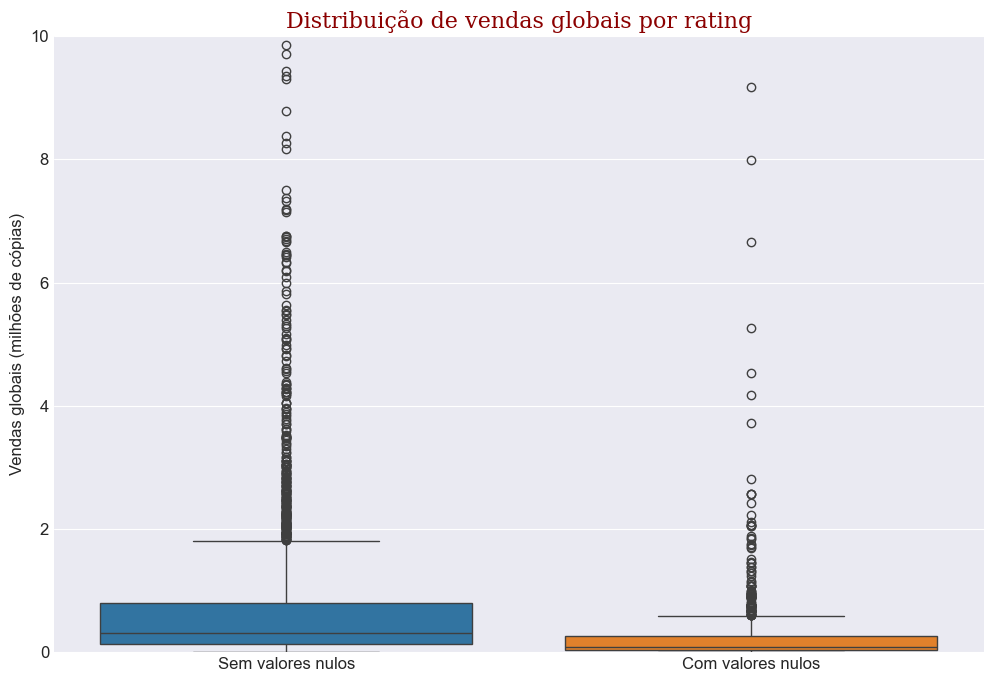

In [75]:
rating_categories = ['Sem valores nulos' if pd.notnull(i) else 'Com valores nulos' 
                    for i in df_7th_gen['rating']]

plt.figure(figsize=(12, 8))
sns.boxplot(x=rating_categories,
            y='global_sales', 
            hue=rating_categories,
            data=df_7th_gen,
            palette=['#1f77b4', '#ff7f0e'],
            legend=False,
            dodge=False)
plt.ylim(0, 10)
plt.title('Distribuição de vendas globais por rating', fontdict=font, fontsize=16)
plt.ylabel('Vendas globais (milhões de cópias)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

*E (Everyone)* é a categoria dominante, respondendo por cerca de um terço de todos os lançamentos. Logo atrás vêm os títulos *T (Teen)*, que juntos com E formam quase 65% de todo o catálogo da sétima geração.  
Isso mostra que a indústria ainda priorizava jogos acessíveis para públicos amplos, apesar do crescimento de jogos mais maduros.

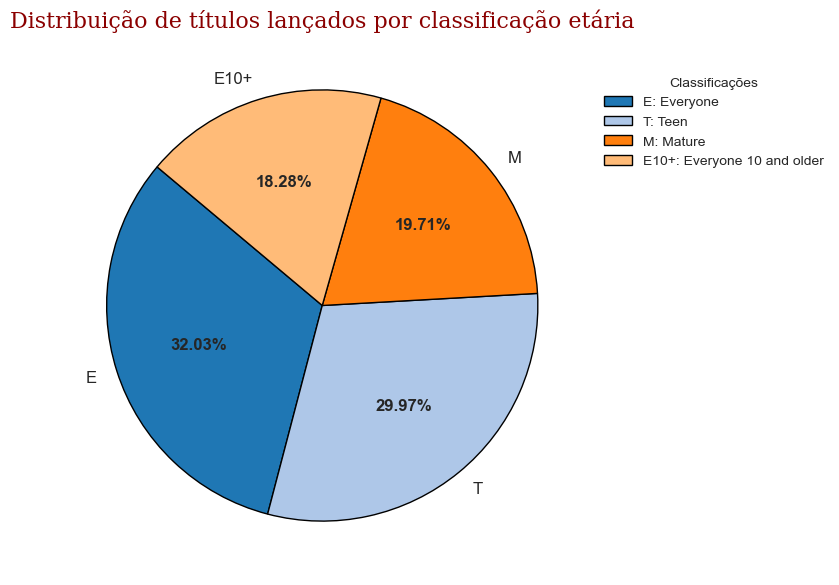

In [76]:
plot_rating_distribution(df_7th_gen, True)

## Distribuição e vendas por classificação etária e plataforma

O padrão muda quando olhamos por plataforma. O Xbox 360 apresenta proporção bem maior de jogos *M (Mature)* — mais de um quarto do catálogo — reflexo da ênfase da Microsoft em *shooters* e jogos de ação de apelo adulto (ex.: *Halo*, *Gears of War*, *Call of Duty*).

O Playstation 3 tem distribuição mais equilibrada entre E, T e M, e o Wii se destaca pela alta concentração de títulos E e E10+, coerente com sua proposta de console familiar.

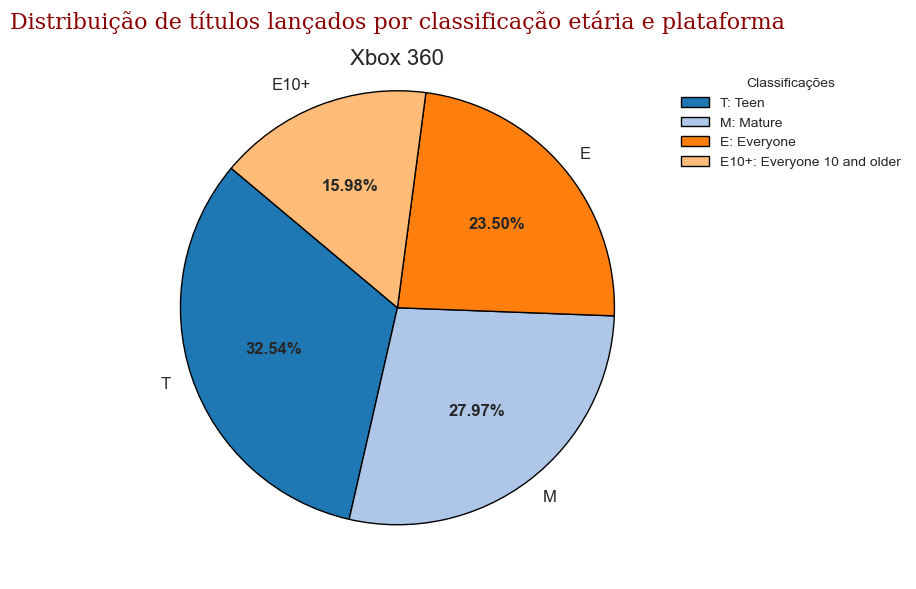

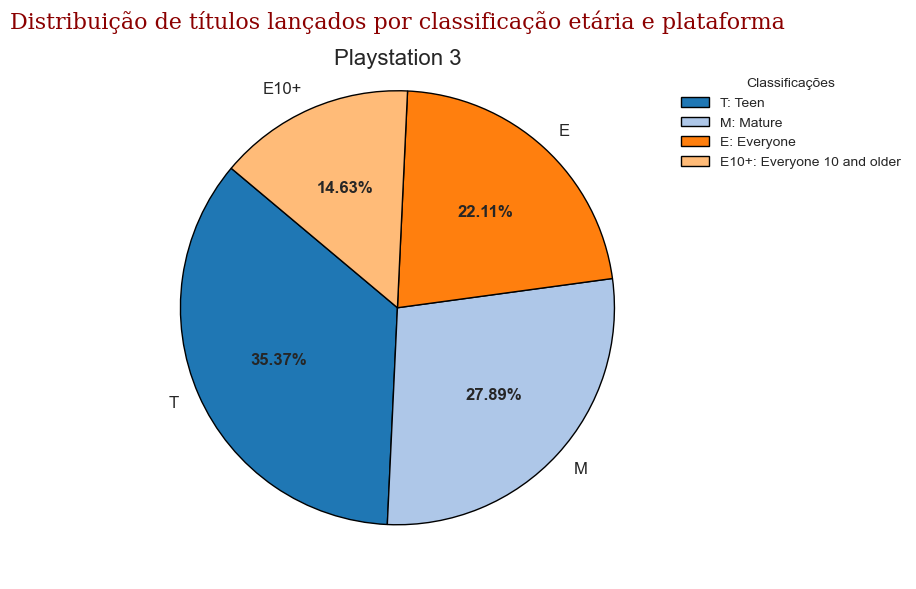

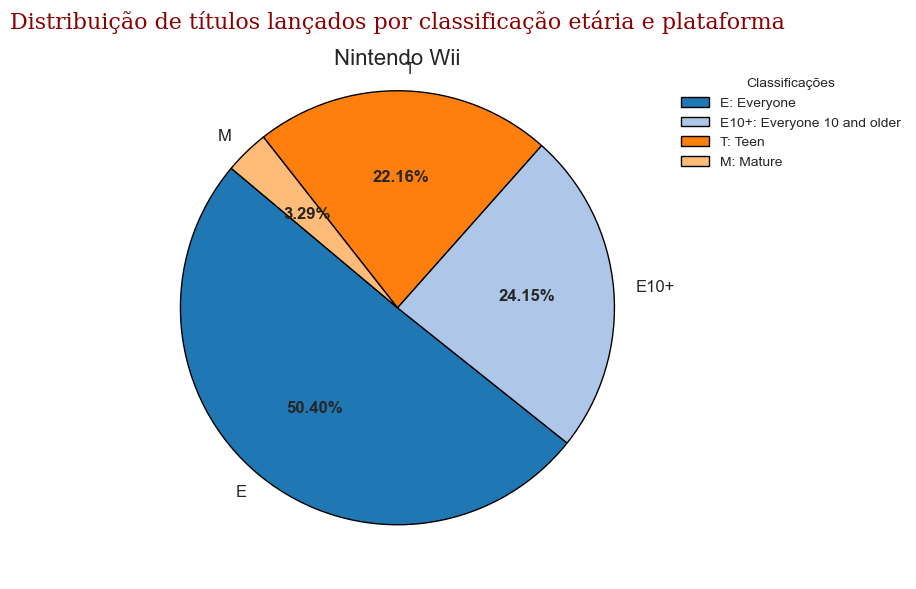

In [77]:
plot_rating_distribution_by_platform(df_7th_gen, gen7, True)

## Vendas por classificação etária por região

As vendas por região reforçam essas diferenças. Na América do Norte, jogos *M* e *T* são líderes absolutos em cópias vendidas, mostrando que o público ocidental da sétima geração se inclinou fortemente para experiências mais “hardcore”.

No Japão, o padrão se inverte parcialmente, com jogos *E* e *T* no domínio, e *M* tendo participação bem menor. Isso faz sentido dado o menor apelo de *shooters* e games violentos no mercado japonês, e o peso dos JRPGs (quase sempre classificados como T).

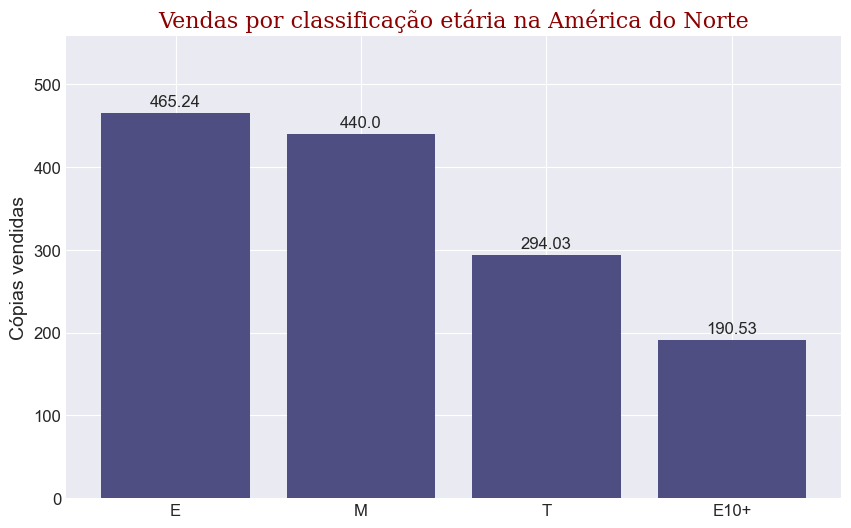

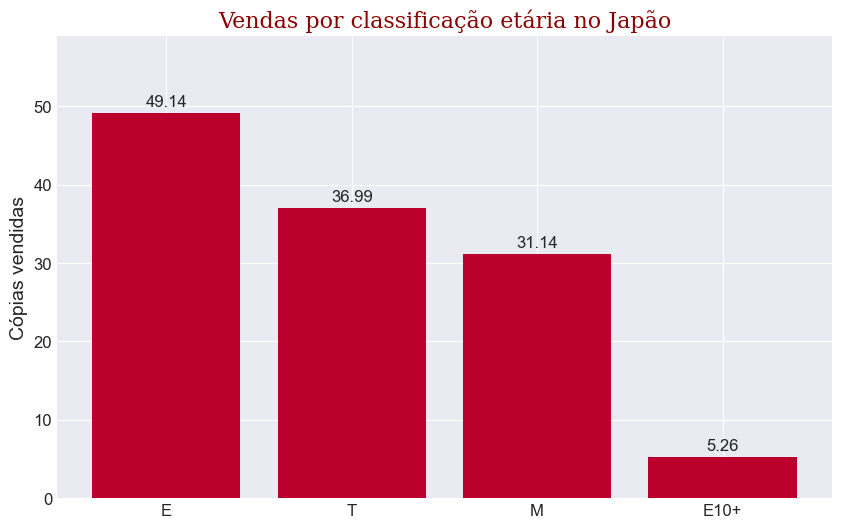

In [78]:
plot_sales_by_rating_per_region(df_7th_gen, selected_regions)

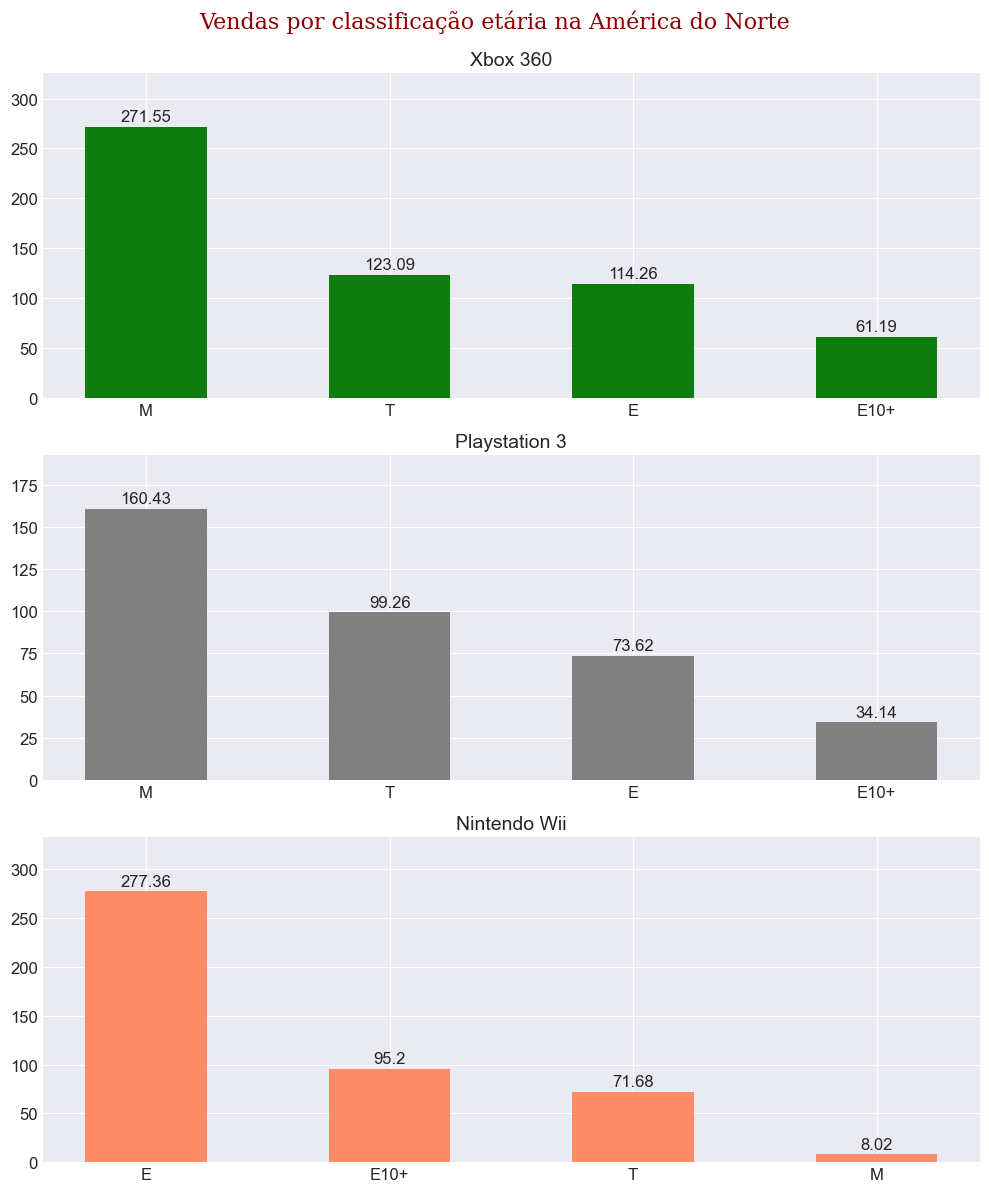

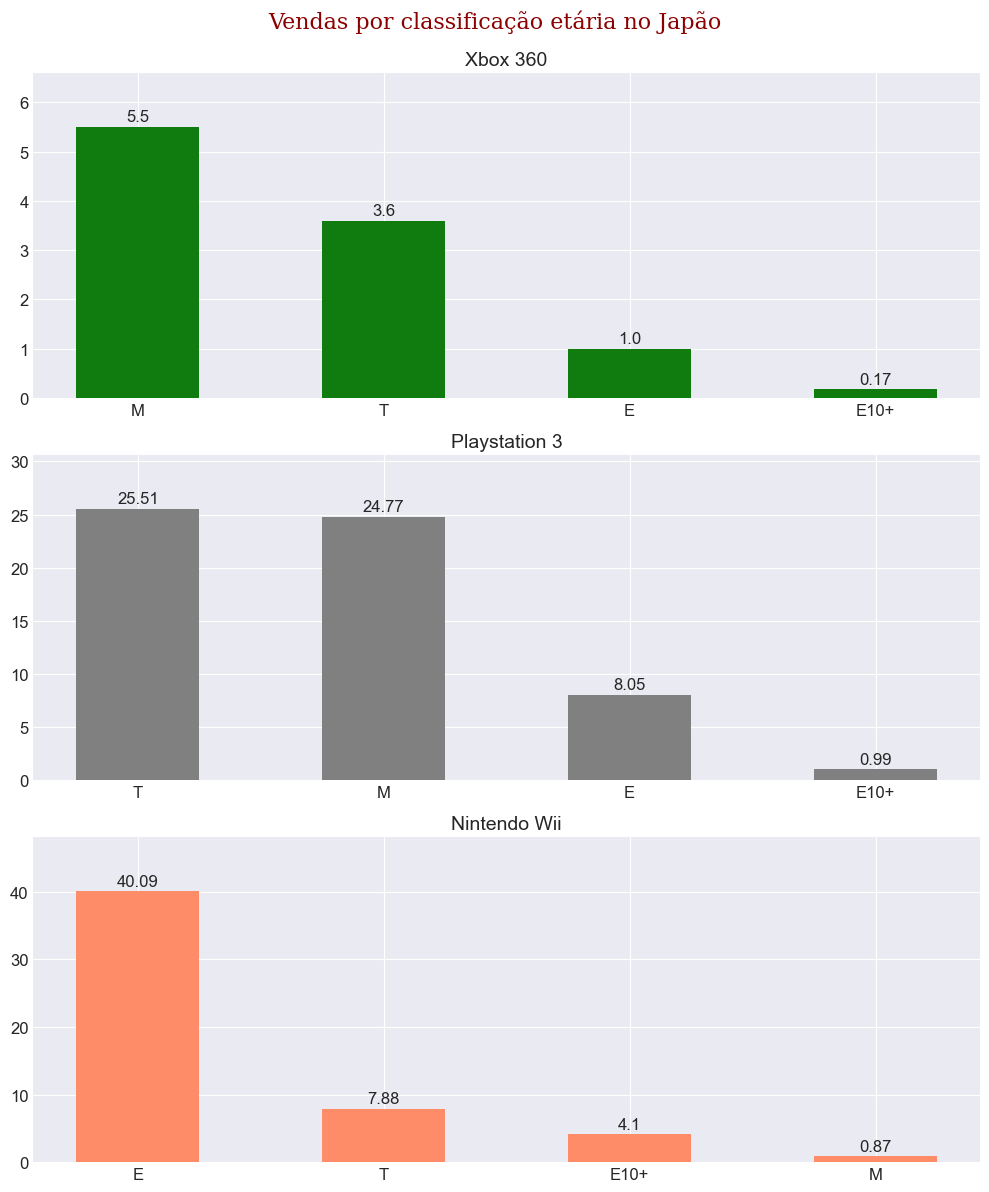

In [79]:
plot_sales_by_rating_per_platform(df_7th_gen, gen7, selected_regions)

# Conclusão
## Mais que números, uma questão cultural
Este projeto partiu da premissa de investigar não apenas “quem venceu nesta geração?”, mas como as preferências culturais e de consumo se manifestam nos dados de vendas entre os mercados norte-americano e japonês. Os resultados confirmam essa hipótese e revelam identidades distintas em cada região.
As análises apontam para dois mercados quase opostos. Na América do Norte, prevaleceu um ambiente competitivo, marcado pela disputa entre Xbox 360 e PlayStation 3, sustentada por gêneros como shooters e sports. Esse padrão reflete uma cultura de jogos orientada por experiências online competitivas, gráficos de ponta e grandes franquias de alto orçamento. A Nintendo, embora bem-sucedida, se destacou em um nicho diferente, voltado ao público casual e familiar.
Já no Japão, o cenário foi dominado por uma forte preferência local e por gêneros narrativos, em especial os RPGs. A liderança da Sony, aliada à força de desenvolvedoras japonesas, reforça esse predomínio. A irrelevância comercial do Xbox 360 no país evidencia barreiras culturais profundas e preferências de game design radicalmente distintas. 
Vale ressaltar que apenas a Nintendo conseguiu transitar com sucesso em ambos os mercados, sustentada por seus eclusivos, pela inovação de seus controles de movimento e por um forte apelo ao público familiar — fatores que a diferenciaram das disputas centradas em poder técnico e gêneros dominantes na América do Norte e no Japão.

## Créditos e Contato

**Desenvolvido por:**  
Bruno Casini

**GitHub:**  
[<img src="https://img.icons8.com/ios-filled/20/000000/github.png"/> GitHub](https://github.com/kzini)  
`https://github.com/kzini`

**LinkedIn:**  
[<img src="https://img.icons8.com/ios-filled/20/000000/linkedin.png"/> LinkedIn](https://www.linkedin.com/in/kzini)  
`https://www.linkedin.com/in/kzini`